## Introduction 

This notebook serves to investigate if there is any common traits among users in the same community that have an impact on their movie preferences.

The communities we use in this notebook is the outputs of the "Community Detection" notebook, and we would like to focus on the best-rated (5.0) and worst-rated (1.0) movies for more distinct comparison. 

The front part of the notebook is for data preparation and defining functions required. 

Analysis starts from Section 2. 

<div class="alert alert-block alert-info">
<h3> Content </h3>

<h4> 1. Data Preparation </h4>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Import Packages
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 Read & Merge Data
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 Clean Data
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.4 Pre-defined functions and variables

<h4> 2. Distribution Studies</h4>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Demographics
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Age
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Occupation
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Residential Region
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Gender
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Ratings
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Overview
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Ratings among Age Groups
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Ratings among Occupations
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Ratings among Regions
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Ratings btween Gender Groups
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Genres (for ratings 1 and 5)
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Genres among Age Groups
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Genres among Occupations
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Genres among Regions
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - &nbsp;&nbsp;Genres btween Gender Groups
<br>

<h4> 3. Sentiment Study</h4>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Sentiments of Tags for best-rated movies of each community
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 Sentiments of Tags for worst-rated movies of each community

<h4> 4. Tags Study</h4>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.1 Word Clouds for best & worst-rated movies
<br>
<h4> 5. Cast & Director Study</h4>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5.1 Most popular casts among rating-5 movies
 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5.2 Most popular casts among rating-1 movies
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5.3 Most popular casts among ratings 1 and 5 movies

<h4> 6. Overall Conclusion</h4>
</div>

## 1. Data Preparation

#### Import Packages

In [1]:
!pip install afinn
!pip install textblob
!pip install colour

import json
import re
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from collections import Counter
import community
from wordcloud import WordCloud, STOPWORDS
import string
import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from afinn import Afinn
import spacy
import random
from colour import Color
import operator
import math

plt.style.use('ggplot')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('max_colwidth', 500)

import warnings
warnings.filterwarnings('ignore')

    100% |████████████████████████████████| 61kB 28.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [2]:
# Mount google drive to read dataset
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
# Change to dataset directory
cd '/content/gdrive/My Drive/BT4222/Dataset'

/content/gdrive/My Drive/BT4222/Dataset


#### Read in Datasets

In [0]:
master_movies_df = pd.read_csv('movie_data_merged_v2.csv')
master_ratings_df_full = pd.read_csv('user_ratings.csv')
user_demo_df = pd.read_csv('users.csv').set_index("userid", drop=True)
del master_movies_df['Unnamed: 0']

In [0]:
# Read in the list of users per community 
with open('community_list.json', 'r') as file:
    nodes_in_coms = json.loads(file.read()) 

#### Pre-defined functions and variables
for subsequent analyasis and plotting

In [0]:
# color lists for plotting of charts later on
color_list1 = ["darksalmon", "#eee8aa", "lime", "pink"]
# colour options for our plots
color_list2 = np.unique(["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
              for i in range(20)])

In [0]:
# get all users, movies from community 1  
com1_users_movies = master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["0"]), ]

# get all users, movies from community 2  
com2_users_movies = master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["1"]), ]

# get all users, movies from community 3 
com3_users_movies = master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["2"]), ]

# get all users, movies from community 4
com4_users_movies= master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["3"]), ]

In [0]:
# count total num of each genres 
def get_ratings_genres_count(com_users_movies, var, ratings_vs_genres=False):
    # df to store the distributions of genres for each rating score
    # columns : ratings
    # rows : genres
    ratings_genres_df = {}

    genres_count = {}
    processed_movies = []
    
    if ratings_vs_genres == False: # we just want the distribution of genres
        # .itertuples() to loop through each row in df
        for row in com_users_movies.itertuples(): 
            # check if movie has been counted before to avoid double counting
            if row.movie in processed_movies:
                continue

            genre_labels = master_movies_df[master_movies_df['movie_id'] == row.movie][var].values
            if len(genre_labels) != 0:
                for genre in genre_labels[0].split(" "):
                    if genre not in genres_count.keys():
                        genres_count[genre] = 0
                        genres_count[genre] += 1 # increase count of genre to account for current movie
                    else:
                        genres_count[genre] += 1

            # add movie to processed list
            processed_movies.append(row.movie)
        
        # convert dict to df
        genres_count_df = pd.DataFrame(genres_count, index=[0]) # there is only 1 row in this df
        genres_count_df = genres_count_df.transform(func = lambda x: round(x/sum(x),3), axis=1) # change to percentage form
        genres_count_df = genres_count_df.sort_index()
        return genres_count_df
    
    else:
        
        for rating in com_users_movies['rating'].unique():
            genres_count = {}
            processed_movies = []
            
            # all movies with current rating
            movies_with_this_rating = com_users_movies.loc[com_users_movies['rating']==rating,]
            
            for movie in movies_with_this_rating.itertuples():
                
                # check if movie has been counted before to avoid double counting
                if movie.movie in processed_movies:
                    continue

                genre_labels = master_movies_df.loc[master_movies_df['movie_id'] == movie.movie][var].values
                if len(genre_labels) != 0:
                    for genre in genre_labels[0].split(" "):
                        if genre not in genres_count.keys():
                            genres_count[genre] = 0
                            genres_count[genre] += 1 # to account for current movie 
                        else: 
                            genres_count[genre] += 1

                processed_movies.append(movie.movie) 

            # ratings vs genres distribution
            ratings_genres_df[rating] = genres_count

        # convert dict to df 
        ratings_genres_df = pd.DataFrame(ratings_genres_df, index=ratings_genres_df[1].keys() )
        ratings_genres_df = ratings_genres_df.reindex(sorted(ratings_genres_df.columns), axis=1) # sort column from 1 to 5 rating scores
        ratings_genres_percent_df = ratings_genres_df.transform(func = lambda x: round(x/sum(x),3), axis=1) # change to percentage form
        ratings_genres_percent_df = ratings_genres_percent_df.T.sort_values(by=0, ascending=False, inplace=False) # sort proportion in descending order
        
        return ratings_genres_percent_df

In [0]:
def plot_ratings_genres_dist(com_ratings_genres_count, com_id):
    plt.figure(figsize=[14,10])
    plt.suptitle('Community %s (Ratings vs Genres)' %com_id, fontsize=15)

    # 1 star
    plt.subplot(2,3,1)
    plt.bar(x=com_ratings_genres_count.index, height=com_ratings_genres_count[1], color=color_list1[com_id-1], edgecolor="black")
    plt.title("1 star Rating", fontsize=15, pad=13)
    plt.xticks(rotation=90)
    plt.yticks(yticks)

    # 2 star
    plt.subplot(2,3,2)
    plt.bar(x=com_ratings_genres_count.index, height=com_ratings_genres_count[2], color=color_list1[com_id-1], edgecolor="black")
    plt.title("2 star Rating", fontsize=15, pad=13)
    plt.xticks(rotation=90)
    plt.yticks(yticks)

    # 3 star
    plt.subplot(2,3,3)
    plt.bar(x=com_ratings_genres_count.index, height=com_ratings_genres_count[3], color=color_list1[com_id-1], edgecolor="black")
    plt.title("3 star Rating", fontsize=15, pad=13)
    plt.xticks(rotation=90)
    plt.yticks(yticks)

    # 4 star
    plt.subplot(2,3,4)
    plt.bar(x=com_ratings_genres_count.index, height=com_ratings_genres_count[4], color=color_list1[com_id-1], edgecolor="black")
    plt.title("4 star Rating", fontsize=15, pad=13)
    plt.xticks(rotation=90)
    plt.yticks(yticks)

    # 5 star
    plt.subplot(2,3,5)
    plt.bar(x=com_ratings_genres_count.index, height=com_ratings_genres_count[5], color=color_list1[com_id-1], edgecolor="black")
    plt.title("5 star Rating", fontsize=15, pad=13)
    plt.xticks(rotation=90)
    plt.yticks(yticks)

    plt.tight_layout()
    plt.subplots_adjust(top=0.90, hspace = 0.5)
    plt.show()

In [0]:
# function to create a list of movies watched by each community 
# output: list of movie genres that each user in community has watched
def com_movie_var(user_movie_dict, var):
    output = []
    processed_movies = []
    
    # get genres of each movie watched within this community
    for movie in Counter(user_movie_dict['movie']).keys():
        
        # skip movie if it was seen before by another user (to avoid double counting genres from same the movie)
        if movie in processed_movies:
            continue
            
        genres = master_movies_df[master_movies_df['movie_id'] == movie][var].values
        if len(genres) != 0 and type(genres[0]) != float: 
            genres = genres[0].split(" ")
        output.extend(genres)
        
        # append movie to processed list 
        processed_movies.append(movie)
            
    return output

In [0]:
# dataframes from each community containing users-movies which has 5 or 1 rating scores
def get_user_rating(com, rating):
    result = master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms[str(com-1)]) & 
                                                (master_ratings_df_full['rating'].astype(str).str.contains(str(rating))), ]
    return result

In [0]:
com1_users_movies_ratings_1 = get_user_rating(1,1)
com2_users_movies_ratings_1 = get_user_rating(2,1)
com3_users_movies_ratings_1 = get_user_rating(3,1)
com4_users_movies_ratings_1 = get_user_rating(4,1)

In [0]:
com1_users_movies_ratings_5 = get_user_rating(1,5)
com2_users_movies_ratings_5 = get_user_rating(2,5)
com3_users_movies_ratings_5 = get_user_rating(3,5)
com4_users_movies_ratings_5 = get_user_rating(4,5)

In [0]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    blob = TextBlob(text)
    # return the polarity
    return round(blob.sentiment.polarity, 2)

# define a function that accepts text and returns the subjectivity
def detect_subjectivity(text):
    blob = TextBlob(text)
    # return the polarity
    return round(blob.sentiment.subjectivity, 2)

In [0]:
# calculate sentiments and subjectivity on each movie Tags 
# create new DataFrame columns for sentiment and subjectivity
master_movies_df['sentiment'] = master_movies_df.tags_clean.apply(detect_sentiment)
master_movies_df['subjectivity'] = master_movies_df.tags_clean.apply(detect_subjectivity)

In [0]:
# function: 
# - get unique list of movies watched by each com
# - return list of sentiments 
def average_com_sentiment(com_movies_dict):
    com_unique_movies = []
    for movie in com_movies_dict['movie'].unique():
        com_unique_movies.append(movie)
    # for each movie, get its sentiment and subjectivity score
    # fill records with NA as 0
    # filter off those records with 0 
    com_movie_sentiments = [master_movies_df.loc[master_movies_df.movie_id == movie, "sentiment"].values 
                             if len(master_movies_df.loc[master_movies_df.movie_id == movie, "sentiment"].values) != 0 
                             else 0 
                             for movie in com_unique_movies]
    com_movie_sentiments = list(filter(lambda x: x != 0, com_movie_sentiments))
    com_movie_sentiments = [x[0] for x in com_movie_sentiments]
    return com_movie_sentiments

In [0]:
all_com_user_movies_5stars = {"com1": list(com1_users_movies_ratings_5['movie']), 
                              "com2": list(com2_users_movies_ratings_5['movie']),
                              "com3": list(com3_users_movies_ratings_5['movie']), 
                              "com4": list(com4_users_movies_ratings_5['movie'])}

In [0]:
# get all plots from each community (5 stars)
com_giant_tags_5stars = []
for com, movies in all_com_user_movies_5stars.items():
    giant_plot = []
    for movie in movies:
        if len(master_movies_df.loc[master_movies_df['movie_id'] == movie, 'tags_clean'].values) != 0:
            giant_plot.append(master_movies_df.loc[master_movies_df['movie_id'] == movie, 'tags_clean'].values[0])
    
    giant_plot_string = " ".join(giant_plot)
    com_giant_tags_5stars.append(giant_plot_string)

In [0]:
all_com_user_movies_1stars = {"com1": list(com1_users_movies_ratings_1['movie']), 
                              "com2": list(com2_users_movies_ratings_1['movie']), 
                              "com3": list(com3_users_movies_ratings_1['movie']), 
                              "com4": list(com4_users_movies_ratings_1['movie'])}

In [0]:
# get all plots from each community (1 star)
com_giant_tags_1stars = []
for com, movies in all_com_user_movies_1stars.items():
    giant_plot = []
    for movie in movies:
        if len(master_movies_df.loc[master_movies_df['movie_id'] == movie, 'tags_clean'].values) != 0:
            giant_plot.append(master_movies_df.loc[master_movies_df['movie_id'] == movie, 'tags_clean'].values[0])
    
    giant_plot_string = " ".join(giant_plot)
    com_giant_tags_1stars.append(giant_plot_string)

In [0]:
# https://stackoverflow.com/questions/51651942/calculate-tf-idf-scores-in-pandas
# how to get the correct idf formula using tfidfVect: https://stackoverflow.com/questions/36756335/calculating-idf-using-tfidfvectorizer-from-sklearn-feature-extraction-text-tfidf#36757263
# TF, IDF, TFIDF formula: http://www.tfidf.com/

def get_keywords_community2_tags(com_giant_plots_list, com_id, ratings=5):
    
    stopwords = ['a', 'able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'back', 'backward', 'backwards', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', 'came', 'can', 'cannot', 'cant', "can't", 'caption', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', "c'mon", 'co', 'co.', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', "c's", 'currently', 'd', 'dare', "daren't", 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'directly', 'do', 'does', "doesn't", 'doing', 'done', "don't", 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'evermore', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'fairly', 'far', 'farther', 'few', 'fewer', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'forever', 'former', 'formerly', 'forth', 'forward', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'half', 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", 'hello', 'help', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', "here's", 'hereupon', 'hers', 'herself', "he's", 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'hundred', 'i', "i'd", 'ie', 'if', 'ignored', "i'll", "i'm", 'immediate', 'in', 'inasmuch', 'inc', 'inc.', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'inside', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", 'its', "it's", 'itself', "i've", 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'known', 'knows', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'likewise', 'little', 'look', 'looking', 'looks', 'low', 'lower', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', "mayn't", 'me', 'mean', 'meantime', 'meanwhile', 'merely', 'might', "mightn't", 'mine', 'minus', 'miss', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'must', "mustn't", 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', "needn't", 'needs', 'neither', 'never', 'neverf', 'neverless', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'no-one', 'nor', 'normally', 'not', 'nothing', 'notwithstanding', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', "one's", 'only', 'onto', 'opposite', 'or', 'other', 'others', 'otherwise', 'ought', "oughtn't", 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provided', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'recent', 'recently', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 'round', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'someday', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', 'take', 'taken', 'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that's", "that've", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', "there'd", 'therefore', 'therein', "there'll", "there're", 'theres', "there's", 'thereupon', "there've", 'these', 'they', "they'd", "they'll", "they're", "they've", 'thing', 'things', 'think', 'third', 'thirty', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'till', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', "t's", 'twice', 'two', 'u', 'un', 'under', 'underneath', 'undoing', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'upwards', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'v', 'value', 'various', 'versus', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", 'welcome', 'well', "we'll", 'went', 'were', "we're", "weren't", "we've", 'what', 'whatever', "what'll", "what's", "what've", 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', "where's", 'whereupon', 'wherever', 'whether', 'which', 'whichever', 'while', 'whilst', 'whither', 'who', "who'd", 'whoever', 'whole', "who'll", 'whom', 'whomever', "who's", 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', 'wonder', "won't", 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']
    stopwords += ['big', 'science', 'apos', 'good', 'best', 'movie']
    
    # IDF
    # use smooth_idf=False and subtract 1 from idf to get the proper idf formula
    vect_tfidf = TfidfVectorizer(stop_words=stopwords)
    tfidf = pd.DataFrame(vect_tfidf.fit_transform(com_giant_plots_list).toarray(), 
                         columns= vect_tfidf.get_feature_names())
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in tfidf.columns:
        word_scores[word] = tfidf.loc[com_id-1, word]
        
        
    if ratings == 5:
        # print words with the top 10 TF-IDF scores
        print('Top TAGS for Community %s with 5 stars rating:' %com_id)
        top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[0:10]
        for idx, word_score in enumerate(top_scores):
            print("%d. %s" %(idx+1, word_score[0]))
    else:
        # print words with the top 10 TF-IDF scores
        print('Top TAGS for Community %s with 1 star rating:' %com_id)
        top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[0:10]
        for idx, word_score in enumerate(top_scores):
            print("%d. %s" %(idx+1, word_score[0]))
         
    
    print('-'*100)  # to create separating space

In [0]:
def get_tfidf_string(com_giant_plots_list, com_id):
    stopwords = ['a', 'able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'back', 'backward', 'backwards', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', 'came', 'can', 'cannot', 'cant', "can't", 'caption', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', "c'mon", 'co', 'co.', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', "c's", 'currently', 'd', 'dare', "daren't", 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'directly', 'do', 'does', "doesn't", 'doing', 'done', "don't", 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'evermore', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'fairly', 'far', 'farther', 'few', 'fewer', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'forever', 'former', 'formerly', 'forth', 'forward', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'half', 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", 'hello', 'help', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', "here's", 'hereupon', 'hers', 'herself', "he's", 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'hundred', 'i', "i'd", 'ie', 'if', 'ignored', "i'll", "i'm", 'immediate', 'in', 'inasmuch', 'inc', 'inc.', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'inside', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", 'its', "it's", 'itself', "i've", 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'known', 'knows', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'likewise', 'little', 'look', 'looking', 'looks', 'low', 'lower', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', "mayn't", 'me', 'mean', 'meantime', 'meanwhile', 'merely', 'might', "mightn't", 'mine', 'minus', 'miss', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'must', "mustn't", 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', "needn't", 'needs', 'neither', 'never', 'neverf', 'neverless', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'no-one', 'nor', 'normally', 'not', 'nothing', 'notwithstanding', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', "one's", 'only', 'onto', 'opposite', 'or', 'other', 'others', 'otherwise', 'ought', "oughtn't", 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provided', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'recent', 'recently', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 'round', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'someday', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', 'take', 'taken', 'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that's", "that've", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', "there'd", 'therefore', 'therein', "there'll", "there're", 'theres', "there's", 'thereupon', "there've", 'these', 'they', "they'd", "they'll", "they're", "they've", 'thing', 'things', 'think', 'third', 'thirty', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'till', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', "t's", 'twice', 'two', 'u', 'un', 'under', 'underneath', 'undoing', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'upwards', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'v', 'value', 'various', 'versus', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", 'welcome', 'well', "we'll", 'went', 'were', "we're", "weren't", "we've", 'what', 'whatever', "what'll", "what's", "what've", 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', "where's", 'whereupon', 'wherever', 'whether', 'which', 'whichever', 'while', 'whilst', 'whither', 'who', "who'd", 'whoever', 'whole', "who'll", 'whom', 'whomever', "who's", 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', 'wonder', "won't", 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']
    stopwords += ['big', 'science', 'apos', 'good', 'best', 'movie']
    
    vect_tfidf = TfidfVectorizer(stop_words=stopwords)
    
    X = vect_tfidf.fit_transform(com_giant_plots_list)
    tfidf = pd.DataFrame(X.toarray(), columns=vect_tfidf.get_feature_names())
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in tfidf.columns:
        word_scores[word] = (tfidf.loc[com_id-1, word])
        
        
    # join each tag into a giant string   
#     top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
    return word_scores

In [0]:
# function to plot overall distribution of each variable for each community 
def plot_user_distribution(com_user_movies, com_id, var="age"):
    plot = ""
    
    if var == "age":
        com_age = []
        for user in com_user_movies['user'].unique():
            com_age.extend(user_demo_df.loc[user_demo_df.index==user, "age"].values)
        
        # apply Counter to get counts of each age group
        com_age = dict(Counter(com_age)) # key = age group
                                         # value = counts of each each age group
            
        # sort the age groups in descending order of counts (big to small)
        com_age = dict(sorted(com_age.items(), key=lambda x:x[0]))
        com_age = pd.DataFrame(sorted(com_age.items(), key=lambda x:x[0], reverse=False), columns=[0, "freq"]).set_index(0, drop=True).T
        com_age = com_age.transform(func = lambda x:round(x/sum(x), 3), axis = 1)
        com_age = com_age.T.sort_values(by='freq', ascending=False).T
        
        # plot the dataframe
        plot = plt.bar(x=[str(x) for x in com_age.columns],
                       height=com_age.loc['freq',].values,
                       color=color_list1[com_id-1],
                       edgecolor="black")

        plt.title("Age distribution in community %d" %com_id, pad=20, fontsize=18)
        plt.xlabel("Age groups")
        plt.ylabel("Proportion")
        plt.xticks(rotation=0, fontsize=14)
        plt.yticks(pl.frange(0, 1, 0.1), fontsize=11)
        
    if var == "occupation":
        com_occupation = []
        for user in com_user_movies['user'].unique():
            if user_demo_df.loc[user_demo_df.index==user, "occupation"].values[0] != 0:
                com_occupation.extend(user_demo_df.loc[user_demo_df.index==user, "occupation"].values)

        # apply Counter to get counts of each occupation
        com_occupation = dict(Counter(com_occupation)) # key = occupation group 
                                                       # value = counts of each each occupation group

        # sort the occupations in descending order of counts (big to small)
        com_occupation_df = pd.DataFrame(sorted(com_occupation.items(), key=lambda x:x[0], reverse=False), columns=[0, "freq"]).set_index(0, drop=True).T
        com_occupation_df = com_occupation_df.transform(func = lambda x:round(x/sum(x), 3), axis = 1)
        # com_occupation_df.freq = [com_occupation_df.freq.values[idx]/total_occupation_df.userid.values[idx] for idx in range(len(com_occupation_df.freq.values))]
        com_occupation_df = com_occupation_df.T.sort_values(by='freq', ascending=False).T
        
        # plot the dataframe
        plot = plt.bar(x=[str(x) for x in com_occupation_df.columns],
                       height=com_occupation_df.loc['freq',].values,
                       color=color_list1[com_id-1],
                       edgecolor="black")
        plt.title("Occupations in community %d" %com_id, pad=20, fontsize=18)
        plt.xlabel("Occupations")
        plt.ylabel("Proportion")
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.yticks(pl.frange(0, 0.5, 0.1), fontsize=11)
    
    if var == "area":
        com_areas = []
        for user in com_user_movies['user'].unique():
            com_areas.extend(user_demo_df.loc[user_demo_df.index==user, "zip_code_area"].values)
        
        # apply Counter to get counts of each area
        com_areas = dict(Counter(com_areas)) # key = occupation group 
                                             # value = counts of each each occupation group
            
        # sort the areas in descending order of counts (big to small)
        com_areas = pd.DataFrame(sorted(com_areas.items(), key=lambda x:x[0], reverse=True), columns=[0, "freq"]).set_index(0, drop=True).T
        com_areas = com_areas.transform(func = lambda x:round(x/sum(x), 3), axis = 1)
        com_areas = com_areas.T.sort_values(by='freq', ascending=False).T
        
        # plot the dataframe
        plot = plt.bar(x=com_areas.columns,
                       height=com_areas.loc['freq',],
                       color=color_list1[int(com_id)-1],
                       edgecolor="black")
        plt.title("Residential Region in community %d" %com_id, pad=20, fontsize=18)
        plt.xlabel("Areas")
        plt.ylabel("Proportion")
        plt.xticks(rotation=45, fontsize=14)
        plt.yticks(pl.frange(0, 1, 0.1), fontsize=11)
        
    if var == "gender":
        com_genders = []
        for user in com_user_movies['user'].unique():
            com_genders.extend(user_demo_df.loc[user_demo_df.index==user, "gender"].values)

        # apply Counter to get counts of each gender
        com_genders = dict(Counter(com_genders)) # key = gender
                                                 # value = counts of each each gender
        
        com_genders = pd.DataFrame(sorted(com_genders.items(), key=lambda x:x[0], reverse=True), columns=[0, "freq"]).set_index(0, drop=True).T
        com_genders = com_genders.transform(func = lambda x:round(x/sum(x), 3), axis = 1)
        com_genders = com_genders.T.sort_values(by='freq', ascending=False).T
        com_genders.columns = ["Male", "Female"]
        
        plot = plt.bar(x=com_genders.columns,
                       height=com_genders.loc['freq',],
                       color=color_list1[com_id-1],
                       edgecolor="black")
        plt.title("Gender distribution in community %d" %com_id, pad=20, fontsize=18)
        plt.xlabel("Genders")
        plt.ylabel("Proportion")
        plt.xticks(rotation=0, fontsize=14)
        plt.yticks(pl.frange(0, 1, 0.1), fontsize=11)
        
    return plot

In [0]:
def plot_genre_dist_over_var(com_user_movie_dict, com_id, var="age"):
    if var == "gender":
        male_genres = [] # list to store all genres watched by all Males 
        female_genres = [] # list to store all genres watched by all Females
        total_genres = [] # list to store all genres watched in this community 

        for idx in com_user_movie_dict.index:
            # Append movie genres to the respective Gender lists
            if (user_demo_df.loc[user_demo_df.index == com_user_movie_dict.loc[idx, 'user'], "gender"].values == "M"):
                if len(master_movies_df.loc[master_movies_df.index == com_user_movie_dict.loc[idx, 'movie'], "genre_label"].values) != 0:
                    male_genres.extend(master_movies_df.loc[master_movies_df.index == com_user_movie_dict.loc[idx, 'movie'], "genre_label"].values[0].split(' '))
                    total_genres.extend(master_movies_df.loc[master_movies_df.index == com_user_movie_dict.loc[idx, 'movie'], "genre_label"].values[0].split(' '))
            else:
                if len(master_movies_df.loc[master_movies_df.index == com_user_movie_dict.loc[idx, 'movie'], "genre_label"].values) != 0:
                    female_genres.extend(master_movies_df.loc[master_movies_df.index == com_user_movie_dict.loc[idx, 'movie'], "genre_label"].values[0].split(' '))
                    total_genres.extend(master_movies_df.loc[master_movies_df.index == com_user_movie_dict.loc[idx, 'movie'], "genre_label"].values[0].split(' '))


        # apply Counter to get counts of each genre for each gender
        male_genres = dict(Counter(male_genres))
        female_genres = dict(Counter(female_genres))
        total_genres_count = dict(Counter(total_genres)) # counts of each genre in the whole com

        # sort the genres by alphabetical order
        male_genres = dict(sorted(male_genres.items(), key=lambda x:x[0], reverse=True))
        female_genres = dict(sorted(female_genres.items(), key=lambda x:x[0], reverse=True))
        

        # convert dicts to dataframes
        male_genres_df = pd.DataFrame(male_genres, index=[0])
        female_genres_df = pd.DataFrame(female_genres, index=[0])

        # combined transposed dataframes for easier plotting
        gender_combine = pd.concat([male_genres_df.T, female_genres_df.T], axis=1)
        gender_combine.columns = ["Male", "Female"] # rename the columns
        gender_combine = gender_combine.fillna(value=0)

        # convert counts to percentage/proportion
        gender_combine = gender_combine.transform(func = lambda x: round(x/sum(x), 2), axis=0)
        return gender_combine
        
    
    if var == "age":
        age_genres_dict = {}
        total_genres = [] # list to store all genres watched in this community 

        for idx in com_user_movie_dict.index:
            # get the age of each user
            age = user_demo_df.loc[user_demo_df.index == com_user_movie_dict.loc[idx, 'user'], "age"].values 
            if len(age) != 0:
                if (age[0]) not in age_genres_dict.keys(): # attach new age group to dict
                    age_genres_dict[age[0]] = [] # value is a list to store movies watched in this age group

                # append the movies watched by this user to the respective age group 
                genre_label = master_movies_df.loc[master_movies_df['movie_id'] == com_user_movie_dict.loc[idx, 'movie'], 'genre_label'].values
                if len(genre_label) != 0:
                    age_genres_dict[age[0]].extend(genre_label[0].split(" "))
                    total_genres.extend(genre_label[0].split(" "))


        # apply Counter to each genre in dict to get the counts of the genres
        # sort the genres according to alphabetical order
        age_genres_dict_counts = {age : dict(sorted(dict(Counter(genres)).items(), 
                                                    key=lambda x:x[0])) for age, genres in age_genres_dict.items()}
        total_genres_counts = dict(Counter(total_genres))

        # convert dict to dataframe for easier plotting
        age_genres_df = pd.DataFrame(age_genres_dict_counts)
        age_genres_df = age_genres_df.reindex(sorted(age_genres_df.columns), axis=1)
        age_genres_df = age_genres_df.fillna(value=0)
        
        # count of current genre in current group / total count of current genre in current com
        age_genres_df = age_genres_df.transform(func = lambda x: x/sum(x), axis = 1)
#         age_genres_df = age_genres_df.transform(func = lambda x: x/sum(x)*100,
#                                                                      axis = 0)
        return age_genres_df
    
    if var == "occupation":
        occupations_genres_dict = {}
        com_occupation = [] # list to store counts of each type of occupation
        total_genres = [] # list to store all genres watched in this community 

        for idx in com_user_movie_dict.index:
            occupation = user_demo_df.loc[user_demo_df.index == com_user_movie_dict.loc[idx, 'user'], "occupation"].values
            if len(occupation) != 0 and occupation[0] != 0:
                com_occupation.append(occupation[0])

                if (occupation[0]) not in occupations_genres_dict.keys(): # attach new age group to dict
                    occupations_genres_dict[occupation[0]] = []
                else: 
                    # append the movies watched by this user to the respective age group 
                    genre_label = master_movies_df.loc[master_movies_df['movie_id'] == com_user_movie_dict.loc[idx, 'movie'], 'genre_label'].values
                    if len(genre_label) != 0:
                        occupations_genres_dict[occupation[0]].extend(genre_label[0].split(" "))
                        total_genres.extend(genre_label[0].split(" "))

        # apply Counter to each value in dict to get the counts of the genres
        # sort the genres according to alphabetical order
        occupations_genres_dict = {occupation:dict(sorted(dict(Counter(genres)).items(), key=lambda x:x[0])) for occupation, genres in occupations_genres_dict.items()}
        total_genres_counts = dict(Counter(total_genres))

        # convert dict to dataframe for easier plotting
        occupations_genres_df = pd.DataFrame(occupations_genres_dict)
        occupations_genres_df = occupations_genres_df.reindex(sorted(occupations_genres_df.columns), axis=1)
        occupations_genres_df = occupations_genres_df.fillna(value=0)
        
        # count of current genre in current group / total count of current genre in current com
        occupations_genres_df_percen = occupations_genres_df.transform(func = lambda x: x/total_genres_counts[x.name], axis=1) 
        
        # get the top 3 occupation with highest count
        top3_occupation = Counter(com_occupation).most_common(3)
        return top3_occupation, occupations_genres_df_percen
    
    if var == "zip_code":
        areas_genres_dict = {}
        total_genres = [] # list to store all genres watched in this community 

        for idx in com_user_movie_dict.index:
            # get each user's zip code area
            # if zip code area is not in dict, make it a key with an empty list
            area_code = user_demo_df.loc[user_demo_df.index == com_user_movie_dict.loc[idx, 'user'], 'zip_code_area'].values
            if len(area_code) != 0:
                if area_code[0] not in areas_genres_dict.keys():
                    areas_genres_dict[area_code[0]] = []

            # process each movie and get its genre labels
            # append genre labels to the respective zip code area list
                movie_genre = master_movies_df.loc[master_ratings_df_full.movie == com_user_movie_dict.loc[idx, 'movie'], 'genre_label'].values
                if len(movie_genre) != 0:
                    areas_genres_dict[area_code[0]].extend(movie_genre[0].split(" "))
                    total_genres.extend(movie_genre[0].split(" "))

        # apply Counter to get counts of each area
        area_codes_counts = {area:dict(Counter(genres)) for area, genres in areas_genres_dict.items()}
        total_genres_count = dict(Counter(total_genres))

        # change dict to dataframe for easier plotting
        # columns : zip code areas
        # rows : genres
        area_codes_counts_df = pd.DataFrame(area_codes_counts)
        area_codes_counts_df = area_codes_counts_df.reindex(sorted(area_codes_counts_df.columns), axis=1)
#         area_codes_counts_df = pd.DataFrame(area_codes_counts, 
#                                             index=total_genres_count.keys())

        # convert counts to proportion 
        # count of current genre in current group / total count of current genre in current com
        area_codes_counts_df_percen = area_codes_counts_df.transform(func = lambda x: x/sum(x), axis = 1)
        return area_codes_counts_df_percen

In [0]:
age_dict = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "Above 56"
}

In [0]:
area_list = ['east', 'east', 'east', 'south-east', 'east', 
            'north-east', 'central', 'south', 'south-west',
            'west']
def assign_area(zc, area_list):
    first_digit = int(zc[0])
    return area_list[first_digit]

In [0]:
user_demo_df['zip_code_area'] = user_demo_df['zip_code'].apply(func=lambda x: assign_area(x, area_list))

In [0]:
com1_ratings_dist = {}
com2_ratings_dist = {}
com3_ratings_dist = {}
com4_ratings_dist = {}

for com, users in nodes_in_coms.items():
    for user in users:
        ratings = master_ratings_df_full.loc[master_ratings_df_full['user'] == user, "rating"].values
        
        if com == "0":
            for rating in ratings:
                if rating not in com1_ratings_dist.keys():
                    com1_ratings_dist[rating] = 0
                com1_ratings_dist[rating] += 1
            
        elif com == "1":
            for rating in ratings:
                if rating not in com2_ratings_dist.keys():
                    com2_ratings_dist[rating] = 0
                com2_ratings_dist[rating] += 1
            
        elif com == "2":
            for rating in ratings:
                if rating not in com3_ratings_dist.keys():
                    com3_ratings_dist[rating] = 0
                com3_ratings_dist[rating] += 1
            
        else:
            for rating in ratings:
                if rating not in com4_ratings_dist.keys():
                    com4_ratings_dist[rating] = 0
                com4_ratings_dist[rating] += 1

In [0]:
# get all users, movies from community 1  
com1_users_movies = master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["0"]), ]

# get all users, movies from community 2  
com2_users_movies = master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["1"]), ]

# get all users, movies from community 3 
com3_users_movies = master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["2"]), ]

# get all users, movies from community 4
com4_users_movies= master_ratings_df_full.loc[master_ratings_df_full['user'].isin(nodes_in_coms["3"]), ]

In [0]:
# function to plot distribution of Ratings vs a demographic
def plot_rating_dist_over_var(com_user_movie_dict, var="age", gender="male"):
    if var == "gender":
        total_ratings = [] # list to store all ratings watched in this community
        
        if gender == "male":
            male_ratings = [] # list to store all ratings given by all Males 
            male_users = user_demo_df[user_demo_df["gender"] == "M"]

            for user in male_users.index.unique():
                ratings = com_user_movie_dict.loc[com_user_movie_dict['user'] == user, 'rating'].values
                if len(ratings) != 0:
                    male_ratings.extend(ratings)
                    total_ratings.extend(ratings)

            # apply Counter to get counts of each genre for each gender
            male_ratings = dict(Counter(male_ratings))
            total_ratings = dict(Counter(total_ratings)) # counts of each genre in the whole com

            # sort the genres by alphabetical order
            male_ratings = dict(sorted(male_ratings.items(), key=lambda x:x[0], reverse=True))

            # convert dicts to dataframes
            male_ratings_df = pd.DataFrame(male_ratings, index=[0])

            # convert counts to percentage/proportion
            male_ratings_df_percent = male_ratings_df.transform(func = lambda x: round(x/sum(x), 3), axis=1)
            
            # tranpose dataframe for easier plotting
            male_ratings_df_percent = male_ratings_df_percent.T

            return male_ratings_df_percent
        
        elif gender == "female":
            female_ratings = [] # list to store all ratings watched by all Females 
            female_users = user_demo_df[user_demo_df["gender"] == "F"]

            for user in female_users.index.unique():
                ratings = com_user_movie_dict.loc[com_user_movie_dict['user'] == user, 'rating'].values
                if len(ratings) != 0:
                    female_ratings.extend(ratings)
                    total_ratings.extend(ratings)


            # apply Counter to get counts of each genre for each gender
            female_ratings = dict(Counter(female_ratings))
            total_ratings = dict(Counter(total_ratings)) # counts of each genre in the whole com

            # sort the ratings by ascending order
            female_ratings = dict(sorted(female_ratings.items(), key=lambda x:x[0]))

            # convert dicts to dataframes
            female_ratings_df = pd.DataFrame(female_ratings, index=[0])

            # convert counts to percentage/proportion
            female_ratings_df_percent = female_ratings_df.transform(func = lambda x: round(x/sum(x), 3), axis=1)
            
            # tranpose dataframe for easier plotting
            female_ratings_df_percent = female_ratings_df_percent.T

            return female_ratings_df_percent
                
    
    if var == "age":
        age_ratings_dict = {}
        total_ratings = [] # list to store all ratings given in this community 

        for user in com_user_movie_dict['user'].unique():
            # get the age of each user
            age = user_demo_df.loc[user_demo_df.index == user, "age"].values 
            if len(age) != 0:
                if (age[0]) not in age_ratings_dict.keys(): # attach new age group to dict
                    age_ratings_dict[age[0]] = [] # value is a list to store movies watched in this age group

                # append the ratings given by this user to the respective age group 
                ratings = com_user_movie_dict.loc[com_user_movie_dict['user'] == user, 'rating'].values # all ratings by this user
                if len(ratings) != 0:
                    age_ratings_dict[age[0]].extend(ratings)
                    total_ratings.extend(ratings)


        # apply Counter to each genre in dict to get the counts of the genres
        # sort the genres according to alphabetical order
        age_ratings_dict_counts = {age : dict(sorted(dict(Counter(ratings)).items(), 
                                                    key=lambda x:x[0])) for age, ratings in age_ratings_dict.items()}
        total_ratings_counts = dict(Counter(total_ratings))

        # convert dict to dataframe for easier plotting
        age_ratings_df = pd.DataFrame(age_ratings_dict_counts)
        age_ratings_df = age_ratings_df.reindex(sorted(age_ratings_df.columns), axis=1)
        age_ratings_df = age_ratings_df.fillna(value=0)
        
        # count of current genre in current group / total count of current genre in current com
        age_ratings_df = age_ratings_df.transform(func = lambda x: round(x/sum(x),3), axis = 1)
        
        return age_ratings_df
  
    
    if var == "occupation":
        occupations_ratings_dict = {}
        com_occupation = [] # list to store counts of each type of occupation
        total_genres = [] # list to store all genres watched in this community 
        total_ratings = [] # list to store all ratings watched in this community 

        for user in com_user_movie_dict['user'].unique():
            occupation = user_demo_df.loc[user_demo_df.index == user, "occupation"].values
            if len(occupation) != 0 and occupation[0] != 0:
                com_occupation.append(occupation[0])

                if (occupation[0]) not in occupations_ratings_dict.keys(): # attach new age group to dict
                    occupations_ratings_dict[occupation[0]] = []
                else: 
                    # append the movies watched by this user to the respective age group 
                    ratings = com_user_movie_dict.loc[com_user_movie_dict['user'] == user, 'rating'].values
                    if len(ratings) != 0:
                        occupations_ratings_dict[occupation[0]].extend(ratings)
                        total_ratings.extend(ratings)

        # apply Counter to each value in dict to get the counts of the genres
        # sort the genres according to alphabetical order
        occupations_ratings_dict = {occupation:dict(sorted(dict(Counter(ratings)).items(), key=lambda x:x[0])) for occupation, ratings in occupations_ratings_dict.items()}
        total_ratings_counts = dict(Counter(total_ratings))

        # convert dict to dataframe for easier plotting
        occupations_ratings_df = pd.DataFrame(occupations_ratings_dict)
        occupations_ratings_df = occupations_ratings_df.reindex(sorted(occupations_ratings_df.columns), axis=1)
        occupations_ratings_df = occupations_ratings_df.fillna(value=0)
        
        # count of current genre in current group / total count of current genre in current com
        occupations_ratings_df_percen = occupations_ratings_df.transform(func = lambda x: x/total_ratings_counts[x.name], axis=1) 
        
        # get the top 3 occupation with highest count
        top3_occupation = Counter(com_occupation).most_common(3)
        return top3_occupation, occupations_ratings_df_percen
    
    
    if var == "zip_code":
        areas_ratings_dict = {}
        total_ratings = [] # list to store all genres watched in this community 

        for user in com_user_movie_dict['user'].unique():
            # get each user's zip code area
            # if zip code area is not in dict, make it a key with an empty list
            area_code = user_demo_df.loc[user_demo_df.index == user, 'zip_code_area'].values
            if len(area_code) != 0:
                if area_code[0] not in areas_ratings_dict.keys():
                    areas_ratings_dict[area_code[0]] = []

            # process each movie and get its genre labels
            # append genre labels to the respective zip code area list
                ratings = com_user_movie_dict.loc[com_user_movie_dict['user'] == user, 'rating'].values
                if len(ratings) != 0:
                    areas_ratings_dict[area_code[0]].extend(ratings)
                    total_ratings.extend(ratings)

        # apply Counter to get counts of each area
        area_codes_counts = {area:dict(Counter(ratings)) for area, ratings in areas_ratings_dict.items()}
        total_ratings = dict(Counter(total_ratings))

        # change dict to dataframe for easier plotting
        # columns : zip code areas
        # rows : genres
        area_codes_counts_df = pd.DataFrame(area_codes_counts)
        area_codes_counts_df = area_codes_counts_df.reindex(sorted(area_codes_counts_df.columns), axis=1)
#         area_codes_counts_df = pd.DataFrame(area_codes_counts, 
#                                             index=total_ratings.keys())

        # convert counts to proportion 
        # count of current genre in current group / total count of current genre in current com
        area_codes_counts_df_percen = area_codes_counts_df.transform(func = lambda x: x/sum(x), axis = 1)
        
        # sort index 
        area_codes_counts_df_percen = area_codes_counts_df_percen.sort_index(ascending=True)
        return area_codes_counts_df_percen

In [0]:
# function to get total counts of each genre in each community
# input: df of user-movie-rating, community number 
# output: dict of counts for each genre
def get_total_genres_in_com(com_users_movies):
    unique_movies = com_users_movies.movie
    genres = []
    for movie in unique_movies:
        genre_labels = master_movies_df.loc[master_movies_df['movie_id'] == movie, "genre_label"].values
        if len(genre_labels) != 0:
            genres.extend(genre_labels[0].split(' '))
    
    # counts of each genre in entire community 
    genres_count = dict(Counter(genres))
    return genres_count

In [0]:
# dicts of total counts of each genre in each community
com1_genre_counts = get_total_genres_in_com(com1_users_movies)
com2_genre_counts = get_total_genres_in_com(com2_users_movies)
com3_genre_counts = get_total_genres_in_com(com3_users_movies)
com4_genre_counts = get_total_genres_in_com(com4_users_movies)

## 2. Distribution Study

<div class="alert alert-block alert-info">
This section aims to find out through the distributions of each User Demographic variable, is there any relationship with the communities. A variable is able to uniquely identify the communities if the distributions are different for all 4 communities. If this scenario is not observed, further drilling down of the data has to be carried out. More specifically, investigations of each User Demographic variable in relation with the ratings given by audiences (section 2.2) and genres watched (section 2.3) will be carried out respectively. 
</div>

### 2.1 Demographics

#### Age

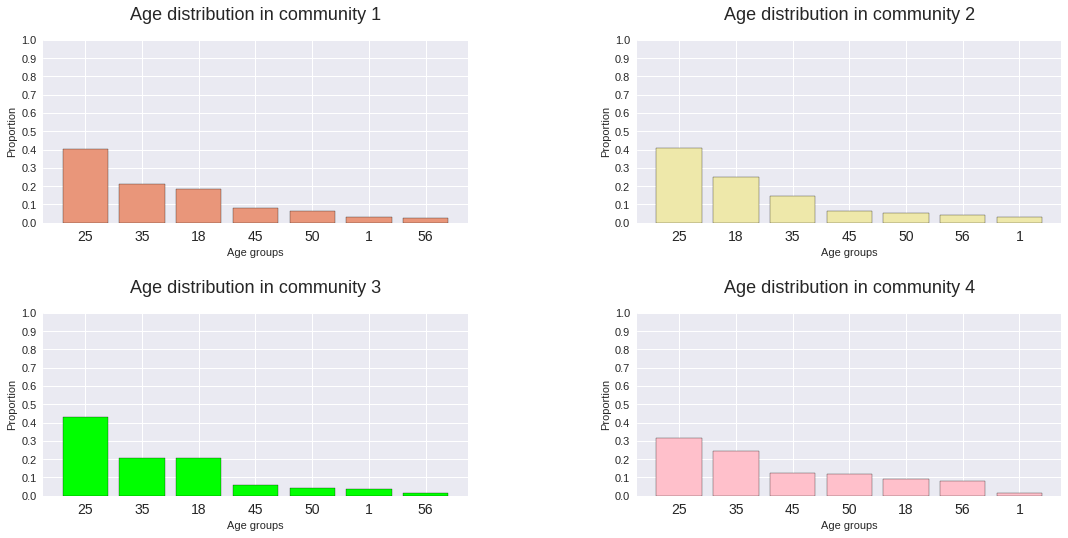

In [38]:
plt.figure(figsize=[15,7])

# community 1
plt.subplot(2,2,1)
plot_user_distribution(com1_users_movies, 1, "age")


# community 2
plt.subplot(2,2,2)
plot_user_distribution(com2_users_movies, 2, "age")


# community 3
plt.subplot(2,2,3)
plot_user_distribution(com3_users_movies, 3, "age")


# community 4
plt.subplot(2,2,4)
plot_user_distribution(com4_users_movies, 4, "age")


plt.tight_layout()
plt.subplots_adjust(wspace=0.4, top=1)
plt.show()

# transparent bars are 5 star ratings

- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

<div class="alert alert-block alert-info">
All 4 communities follow similar distributions for the different age groups, with most audiences coming from *25 to 34*, *35 to 44* and *18 to 24* age groups. While community 4 looks like an exception, we cannot conclude that at this point of time as the distributions is quite similar to that of the population. 
</div>

#### Occupation

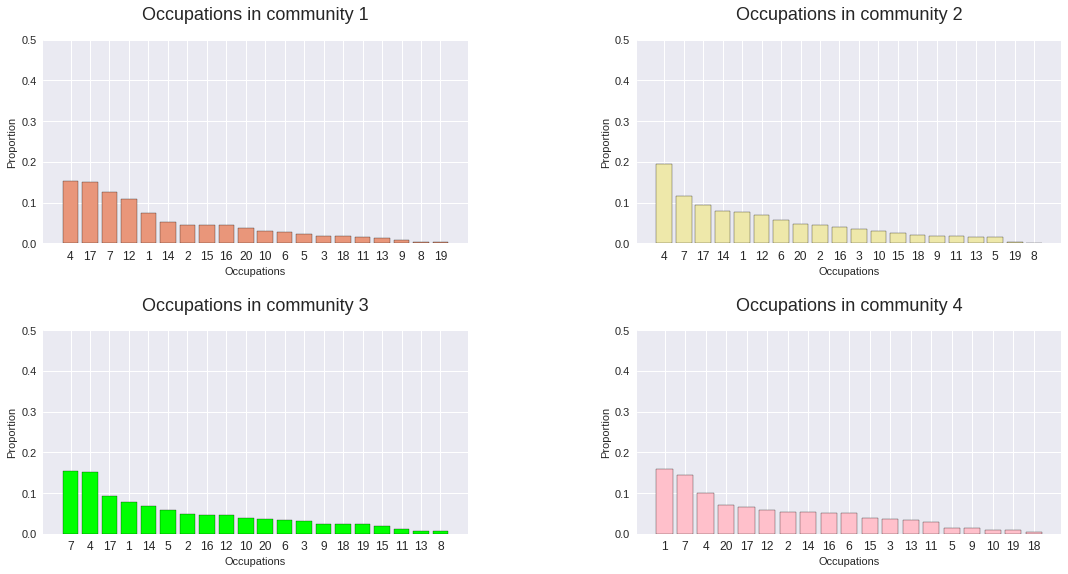

In [0]:
plt.figure(figsize=[15,7.5])

# community 1
plt.subplot(2,2,1)
plot_user_distribution(com1_users_movies, 1, "occupation")


# community 2
plt.subplot(2,2,2)
plot_user_distribution(com2_users_movies, 2, "occupation")

# community 3
plt.subplot(2,2,3)
plot_user_distribution(com3_users_movies, 3, "occupation")

# community 4
plt.subplot(2,2,4)
plot_user_distribution(com4_users_movies, 4, "occupation")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, top=1.0)
plt.show()

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

<div class="alert alert-block alert-info">
Similar to Age, all 4 communities seem to have similar distribution for the different occupations. Most of the audience in each community are either *college students*,  *executives* and *technicians*. Although they have similar distributions, there are some subtle differences observed here. Community 2 has a significantly higher proportion of college students and lower proportion of executives compared with the other communities. While most audiences in community 4 are *educators* instead of technicians. These differences may point that Occupation factor might be a unique trait to these communities. 
</div>

#### Residential Region

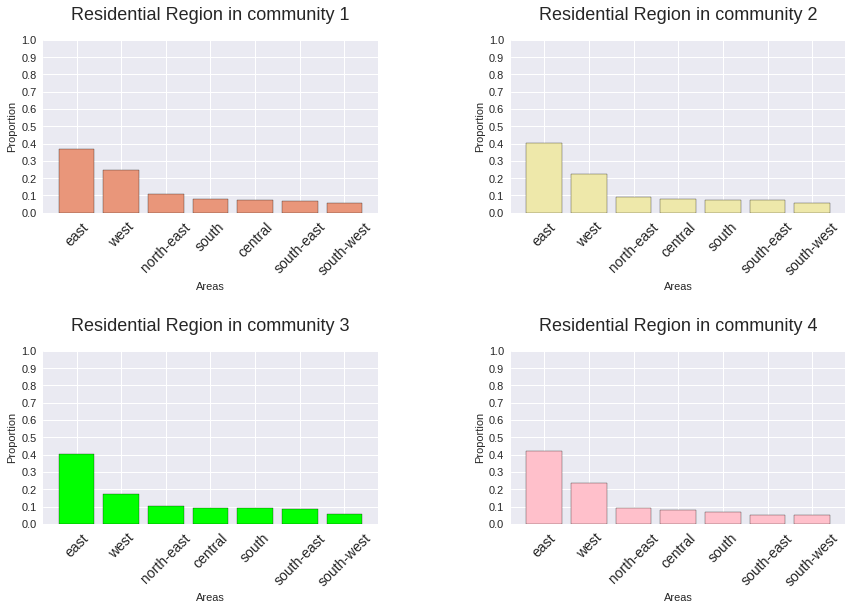

In [0]:
plt.figure(figsize=[12,8])

# community 1
plt.subplot(2,2,1)
plot_user_distribution(com1_users_movies, 1, "area")

# community 2
plt.subplot(2,2,2)
plot_user_distribution(com2_users_movies, 2, "area")

# community 3
plt.subplot(2,2,3)
plot_user_distribution(com3_users_movies, 3, "area")

# community 4
plt.subplot(2,2,4)
plot_user_distribution(com4_users_movies, 4, "area")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, top=1.0)
plt.show()

<div class="alert alert-block alert-info">
We see all 4 communities follow the same distribution for Residential Region, with most audiences residing in either *East*, *West* and *North-East*. This distribution follows that of the population. More investigation has to be carried out in section 2.2 and 2.3 to conclude if Residential Region has any differentiating power. 
</div>

#### Gender

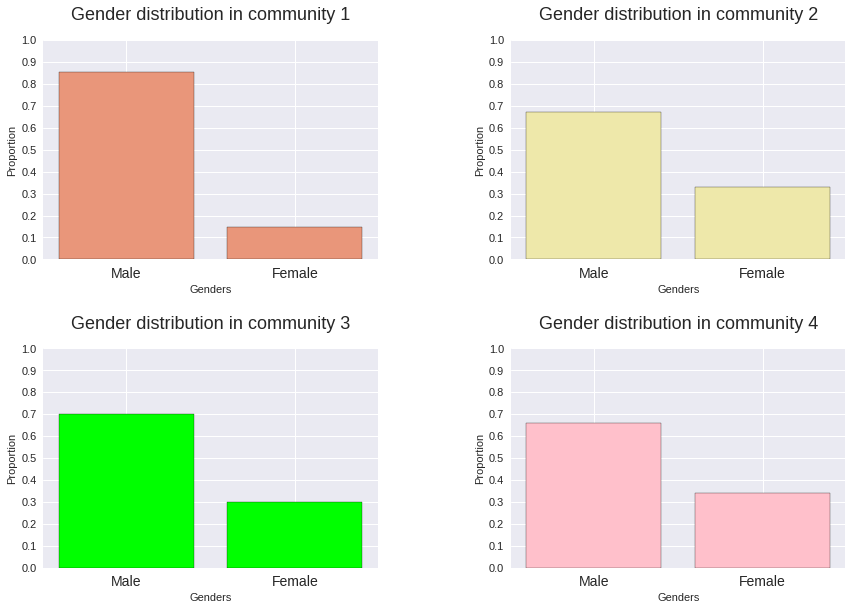

In [0]:
plt.figure(figsize=[12,8])

# community 1
plt.subplot(2,2,1)
plot_user_distribution(com1_users_movies, 1, "gender")

# community 2
plt.subplot(2,2,2)
plot_user_distribution(com2_users_movies, 2, "gender")

# community 3
plt.subplot(2,2,3)
plot_user_distribution(com3_users_movies, 3, "gender")

# community 4
plt.subplot(2,2,4)
plot_user_distribution(com4_users_movies, 4, "gender")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, top=1.0)
plt.show()

<div class="alert alert-block alert-info">
Just like previous variables, all 4 communities are having similar distributions for Gender type. The distribution is skewed towards the *Males*. This distribution follows that of the population. While the other communities have similar proportions of each gender, community 1 is observed to have a significantly higher proportion of *Males* compared to *Females*. We are unable to conclude if Gender has any differentiating power at this point of time as the differences are very small. Further investigations need to be carried out in section 2.2 and 2.3.
</div>

### 2.2 Ratings

<div class="alert alert-block alert-info">
This aims to find any relationships between each User Demographic variable's responses with ratings given by each audience for a movie. This relationship can be used to uniquely identify each community. 
</div>

#### Overview

In [0]:
com1_pcent = []

# make PrettyTable to display the results for each community's rating distribution
x = PrettyTable()
x.field_names = ["Rating Scores", "%"] # table columns

# calculate the distributions
for rating, count in com1_ratings_dist.items():
    pcent = float(count)/sum(com1_ratings_dist.values())*100
    com1_pcent.append( (round(rating, 1), str(round(pcent, 2)) ) )
com1_pcent = sorted(com1_pcent, key=lambda x:x[0], reverse=True)

for i in com1_pcent[:5]:
    x.add_row([i[0], i[1]+'%'])

print("There are %d users in community 1." %len(nodes_in_coms["0"]))
print(x)
print('*'*100 + '\n')


com2_pcent = []

# make PrettyTable to display the results for each community's rating distribution
x = PrettyTable()
x.field_names = ["Rating Scores", "%"] # table columns

# calculate the distributions
for rating, count in com2_ratings_dist.items():
    pcent = float(count)/sum(com2_ratings_dist.values())*100
    com2_pcent.append( (round(rating, 1), str(round(pcent, 2)) ) )
com2_pcent = sorted(com2_pcent, key=lambda x:x[0], reverse=True)

for i in com2_pcent[:5]:
    x.add_row([i[0], i[1]])

print("There are %d users in community 2." %len(nodes_in_coms["1"]))
print(x)
print('*'*100 + '\n')


com3_pcent = []

# make PrettyTable to display the results for each community's rating distribution
x = PrettyTable()
x.field_names = ["Rating Scores", "%"] # table columns

# calculate the distributions
for rating, count in com3_ratings_dist.items():
    pcent = float(count)/sum(com3_ratings_dist.values())*100
    com3_pcent.append( (round(rating, 1), str(round(pcent, 2)) ) )
com3_pcent = sorted(com3_pcent, key=lambda x:x[0], reverse=True)

for i in com3_pcent[:5]:
    x.add_row([i[0], i[1]])

print("There are %d users in community 3." %len(nodes_in_coms["2"]))
print(x)
print('*'*100 + '\n')


com4_pcent = []

# make PrettyTable to display the results for each community's rating distribution
x = PrettyTable()
x.field_names = ["Rating Scores", "%"] # table columns

# calculate the distributions
for rating, count in com4_ratings_dist.items():
    pcent = float(count)/sum(com4_ratings_dist.values())*100
    com4_pcent.append( (round(rating, 1), str(round(pcent, 2)) ) )
com4_pcent = sorted(com4_pcent, key=lambda x:x[0], reverse=True)

for i in com4_pcent[:5]:
    x.add_row([i[0], i[1]])

print("There are %d users in community 4." %len(nodes_in_coms["3"]))
print(x)
print('*'*100 + '\n')

There are 756 users in community 1.
+---------------+--------+
| Rating Scores |   %    |
+---------------+--------+
|       5       | 23.99% |
|       4       | 35.04% |
|       3       | 25.52% |
|       2       | 10.31% |
|       1       | 5.16%  |
+---------------+--------+
****************************************************************************************************

There are 1036 users in community 2.
+---------------+-------+
| Rating Scores |   %   |
+---------------+-------+
|       5       | 22.67 |
|       4       | 34.85 |
|       3       | 26.02 |
|       2       | 10.78 |
|       1       |  5.69 |
+---------------+-------+
****************************************************************************************************

There are 406 users in community 3.
+---------------+-------+
| Rating Scores |   %   |
+---------------+-------+
|       5       | 18.88 |
|       4       | 33.35 |
|       3       | 28.85 |
|       2       | 12.04 |
|       1       |  6.89 |
+-

<div class="alert alert-block alert-info">
Each community's distribution of ratings are quite similar to each other, with most ratings being 3 to 5. These distributions follow that of the population's distribution of ratings. Thus, we can conclude ratings, by itself does not have any differentiating power to uniquely identify the communities. 
</div>

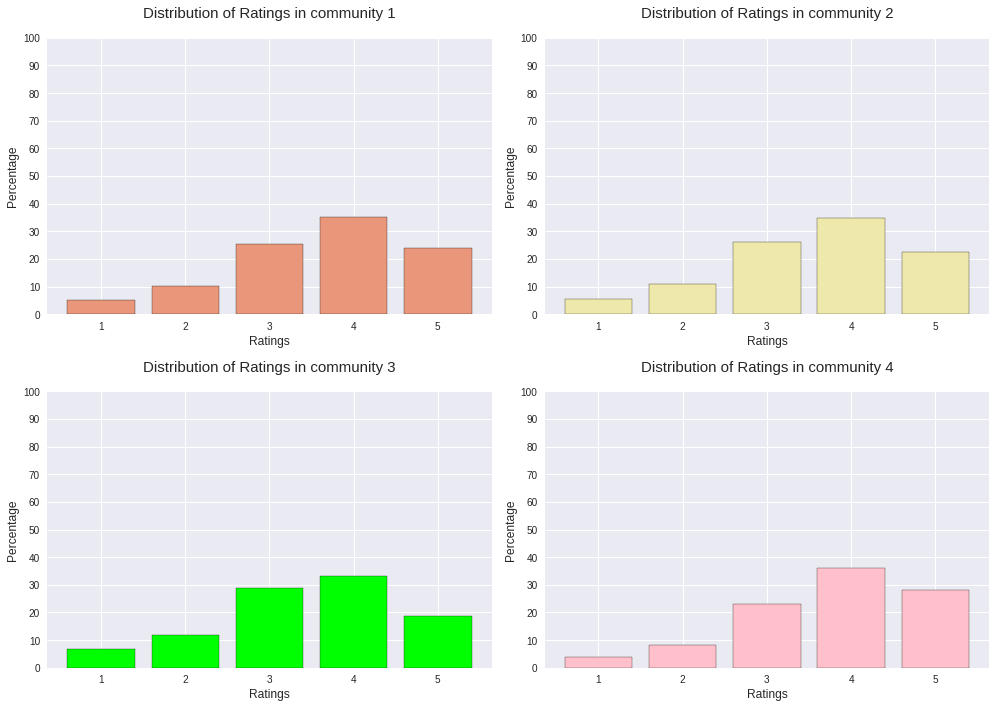

In [0]:
# Plotting the rating distribution for each community 
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.bar(x=[rating[0] for rating in com1_pcent], height=[float(rating[1]) for rating in com1_pcent], color=color_list1[0], edgecolor="black")
plt.title("Distribution of Ratings in community 1", pad=20, fontsize=15)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.yticks(np.arange(0,110,10), fontsize=10)

plt.subplot(2,2,2)
plt.bar(x=[rating[0] for rating in com2_pcent], height=[float(rating[1]) for rating in com2_pcent], color=color_list1[1], edgecolor="black")
plt.title("Distribution of Ratings in community 2", pad=20, fontsize=15)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.yticks(np.arange(0,110,10), fontsize=10)

plt.subplot(2,2,3)
plt.bar(x=[rating[0] for rating in com3_pcent], height=[float(rating[1]) for rating in com3_pcent], color=color_list1[2], edgecolor="black")
plt.title("Distribution of Ratings in community 3", pad=20, fontsize=15)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.yticks(np.arange(0,110,10), fontsize=10)

plt.subplot(2,2,4)
plt.bar(x=[rating[0] for rating in com4_pcent], height=[float(rating[1]) for rating in com4_pcent], color=color_list1[3], edgecolor="black")
plt.title("Distribution of Ratings in community 4", pad=20, fontsize=15)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.yticks(np.arange(0,110,10), fontsize=10)

plt.tight_layout()
plt.show()

<div class="alert alert-info">
The distributions of ratings are slightly skewed to the left with the most common ratings being 4 which shows that users in each community tend to like what they have watched. The distributions are almost the same for all 4 communities.
</div>

#### Distribution of Ratings among Age Groups

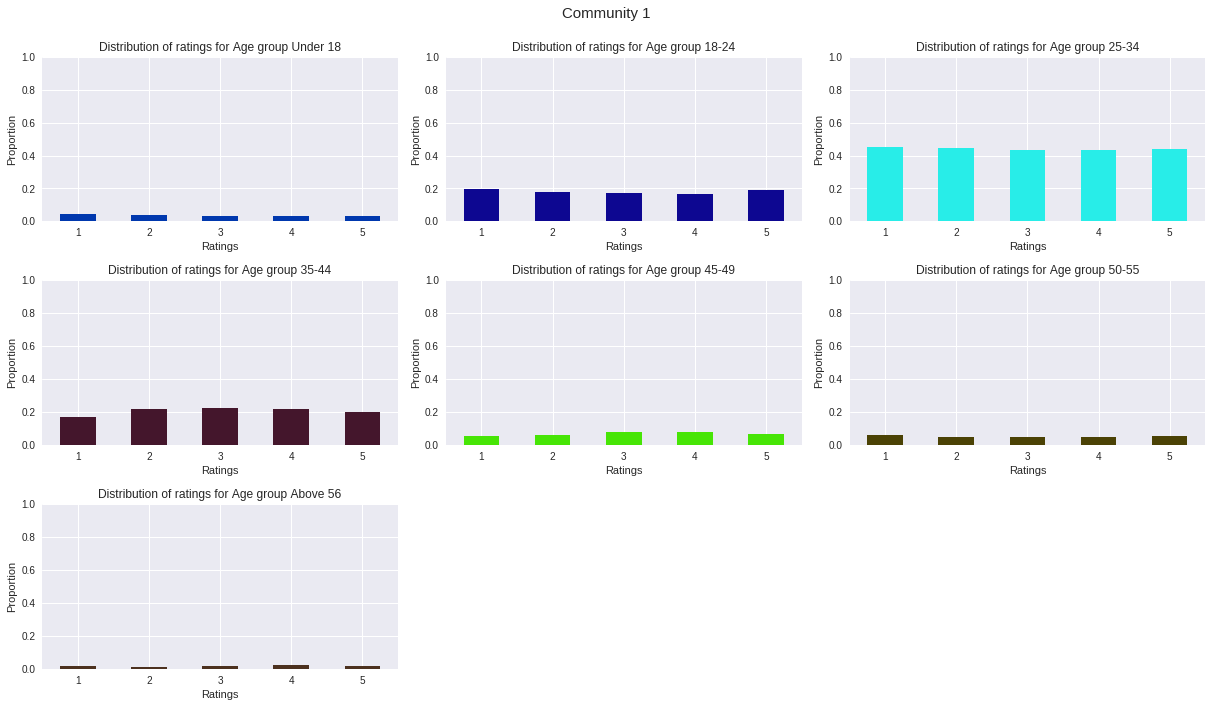

In [0]:
# Community 1 

fig = plt.figure()
fig.suptitle("Community 1", fontsize = 15)

# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com1_ratings_age_df = plot_rating_dist_over_var(com1_users_movies, "age")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com1_ratings_age_df.columns.values)):
    
    ax = com1_ratings_age_df[com1_ratings_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                  title = "Distribution of ratings for Age group %s" %age_dict[com1_ratings_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_xlabel("Ratings")
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

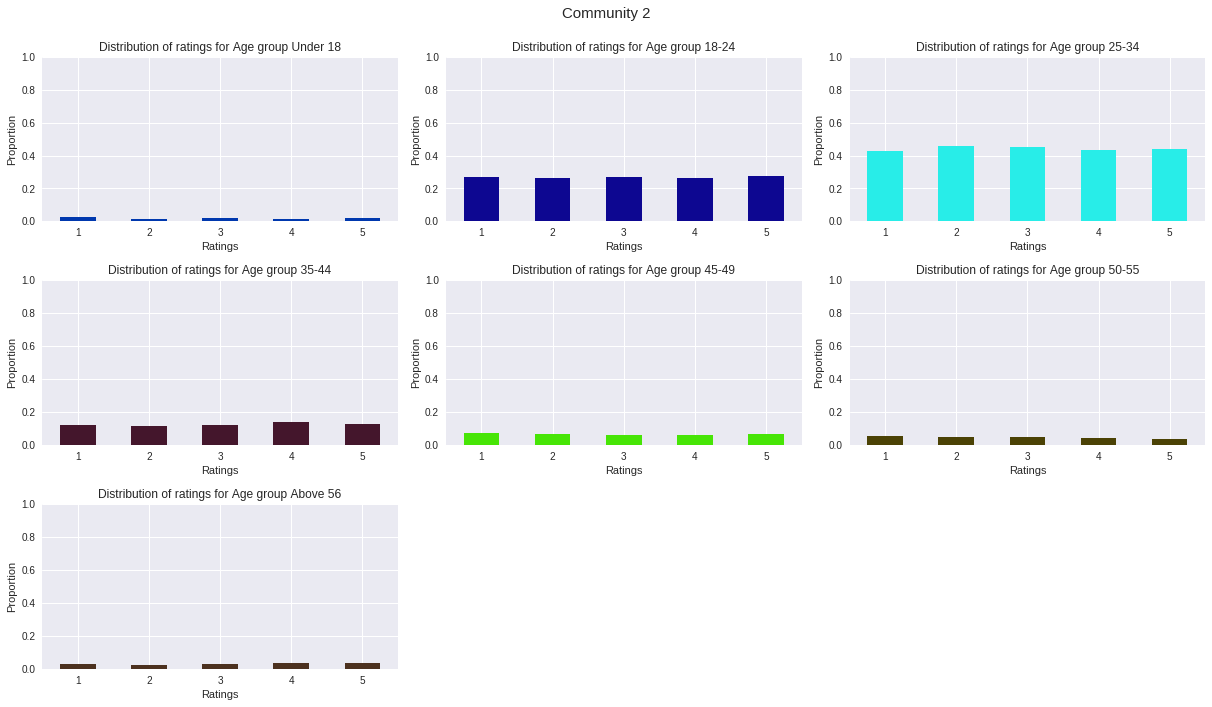

In [0]:
# Community 2

fig = plt.figure()
fig.suptitle("Community 2", fontsize = 15)
gs = gridspec.GridSpec(3, 3)
com2_ratings_age_df = plot_rating_dist_over_var(com2_users_movies, "age")
for idx in range(len(com2_ratings_age_df.columns.values)):
    ax = com2_ratings_age_df[com2_ratings_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                  title = "Distribution of ratings for Age group %s" %age_dict[com2_ratings_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_xlabel("Ratings")
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_ylim(0, 1, auto=True)
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

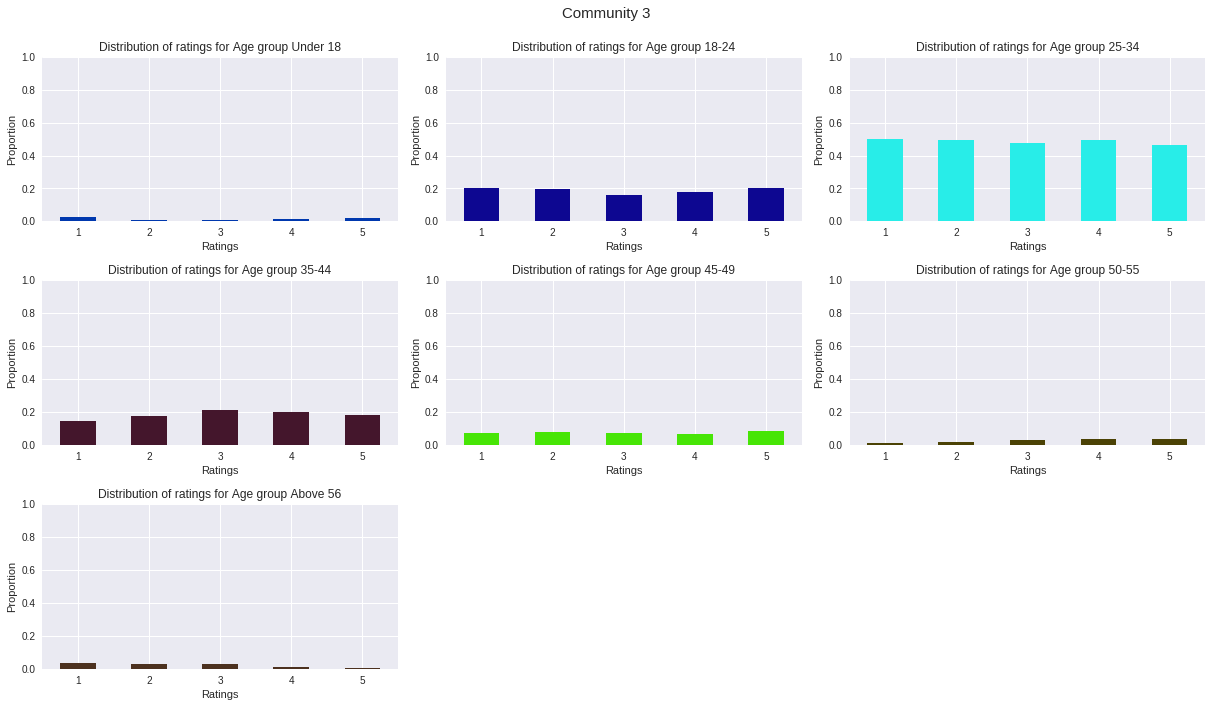

In [0]:
# Community 3

fig = plt.figure()
fig.suptitle("Community 3", fontsize = 15)
gs = gridspec.GridSpec(3, 3)
com3_ratings_age_df = plot_rating_dist_over_var(com3_users_movies, "age")
for idx in range(len(com3_ratings_age_df.columns.values)):
    ax = com3_ratings_age_df[com3_ratings_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                  title = "Distribution of ratings for Age group %s" %age_dict[com3_ratings_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_xlabel("Ratings")
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

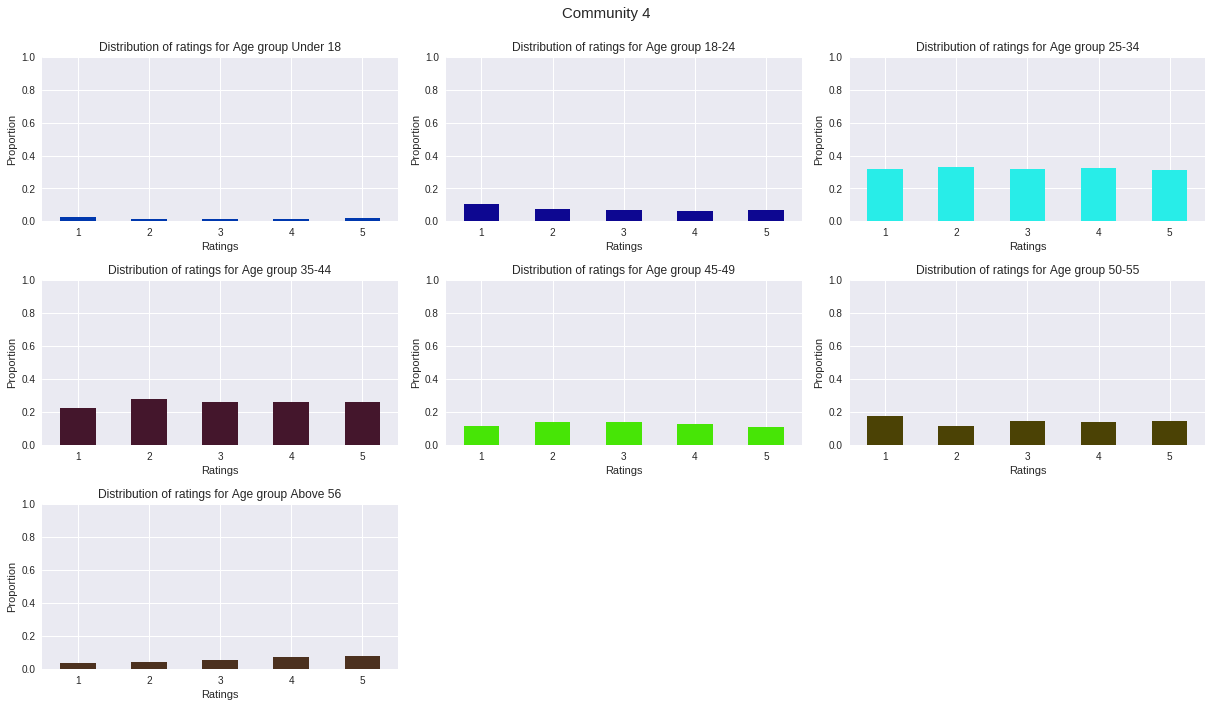

In [0]:
# Community 4
fig = plt.figure()
fig.suptitle("Community 4", fontsize = 15)
gs = gridspec.GridSpec(3, 3)
com4_ratings_age_df = plot_rating_dist_over_var(com4_users_movies, "age")
for idx in range(len(com4_ratings_age_df.columns.values)):   
    ax = com4_ratings_age_df[com4_ratings_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                  title = "Distribution of ratings for Age group %s" %age_dict[com4_ratings_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_xlabel("Ratings")
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-info">
When we plot out the distributions of ratings across each age group, we did find some differences between each community for the same age group. In community 2, audiences of age 35 to 44 are more likely to give good ratings of 4 stars whereas compared with community 4, the same group of audience is more likely to give bad ratings of 2 stars. In community 1, audiences who are 56 and above are more likely to give good ratings of 4 to 5 stars. When compared to community 3, the same group of audience is more likely to give bad ratings of 1 to 3 stars. 
<br>
<br>
We also observed that certain age groups in certain communities have similar distributions. As such, we think that other variables need to be included in the analysis in order to have a clear distinction between these group of audiences.  
</div>

#### Distribution of Ratings among top 3 Occupations 

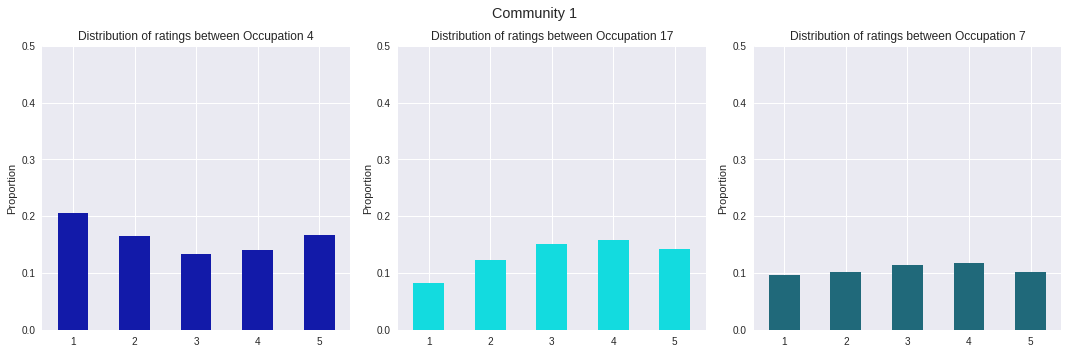

In [0]:
# community 1
com_occupation, occupations_genres_df_percen = plot_rating_dist_over_var(com1_users_movies, "occupation")

fig = plt.figure()
fig.suptitle("Community 1")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", 
                                                                          color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx]) # assigns the subplot to current occupation
                                                                         )
    ax.set_title("Distribution of ratings between Occupation %s" %(str(com_occupation[idx][0])))
    ax.tick_params(rotation=0)
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

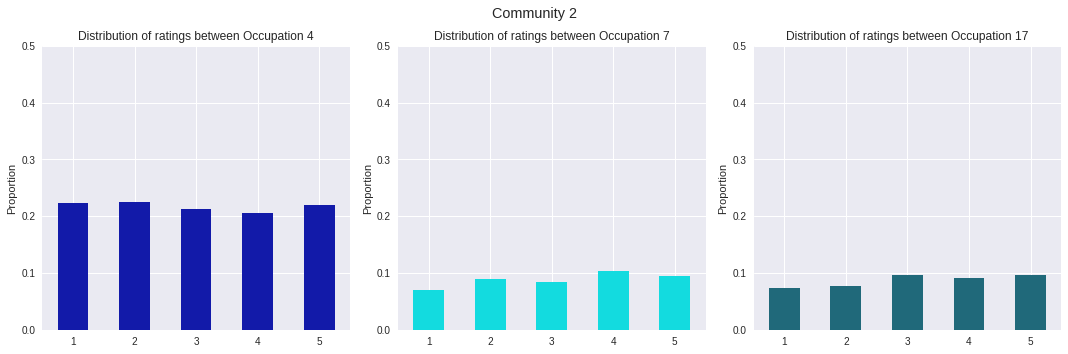

In [0]:
# community 2 
com_occupation, occupations_genres_df_percen = plot_rating_dist_over_var(com2_users_movies, "occupation")

fig = plt.figure()
fig.suptitle("Community 2")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", 
                                                                          color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx]) # assigns the subplot to current occupation
                                                                         )
    ax.set_title("Distribution of ratings between Occupation %s" %(str(com_occupation[idx][0])))
    ax.tick_params(rotation=0)
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

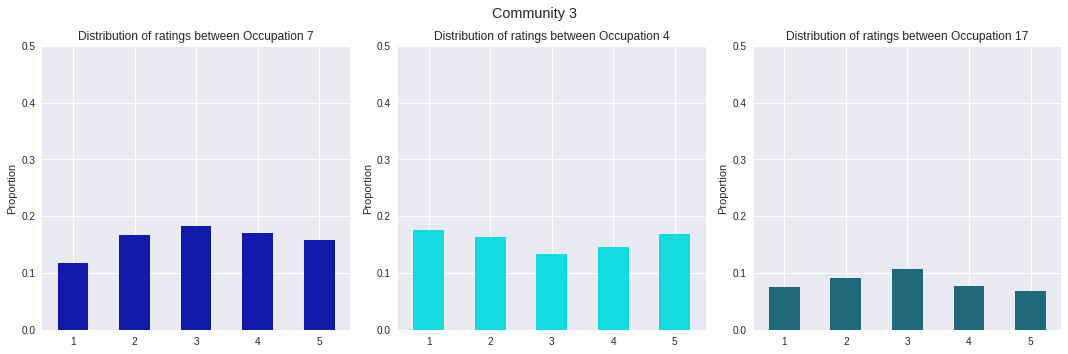

In [0]:
# community 3
com_occupation, occupations_genres_df_percen = plot_rating_dist_over_var(com3_users_movies, "occupation")

fig = plt.figure()
fig.suptitle("Community 3")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", 
                                                                          color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx]) # assigns the subplot to current occupation
                                                                         )
    ax.set_title("Distribution of ratings between Occupation %s" %(str(com_occupation[idx][0])))
    ax.tick_params(rotation=0)
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

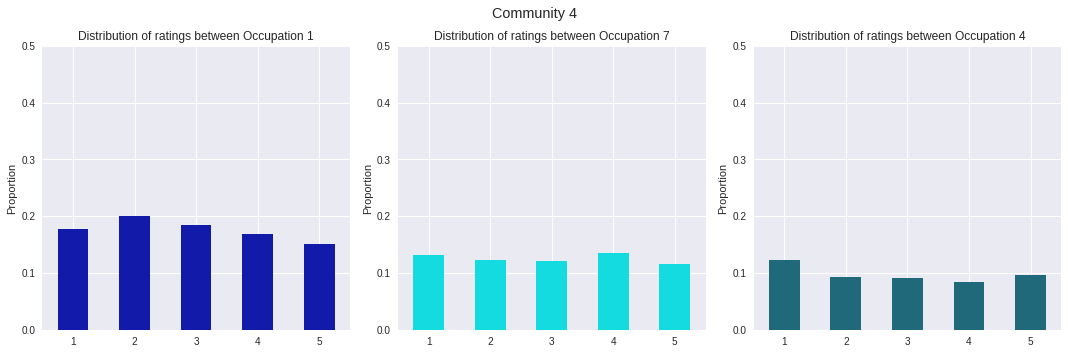

In [0]:
# community 4
com_occupation, occupations_genres_df_percen = plot_rating_dist_over_var(com4_users_movies, "occupation")

fig = plt.figure()
fig.suptitle("Community 4")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", 
                                                                          color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx]) # assigns the subplot to current occupation
                                                                         )
    ax.set_title("Distribution of ratings between Occupation %s" %(str(com_occupation[idx][0])))
    ax.tick_params(rotation=0)
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-info">
The differences between the distributions among the top 3 occupations in each community are less subtle here. In community 1 and community 4, audiences who are college students (occupation 4) are more likely to give bad ratings of 1 star compared to the same group of audience from the other two communities. Non-college students in community 4 tend to give slighly worse ratings (2 stars). Executives (occupation 7) in all communities tend to give good ratings (3 to 5 stars). While programmers (occupation 17) tend to give good ratings as well (3 to 5 stars). 
</div>

#### Distribution of Ratings among Regions

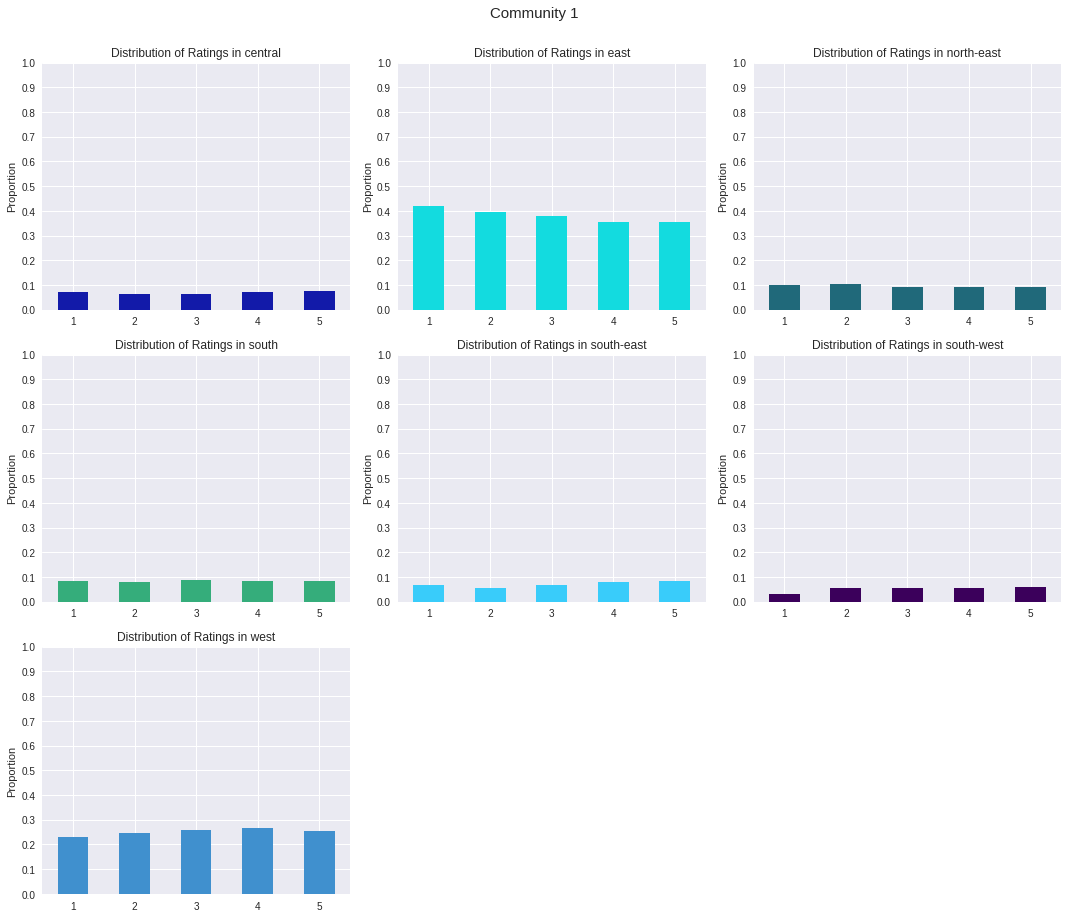

In [0]:
# Community 1 
com1_ratings_areas = plot_rating_dist_over_var(com1_users_movies, "zip_code")

fig = plt.figure()
fig.suptitle("Community 1", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com1_ratings_areas.columns:
    com1_ratings_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Ratings in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1

# plt.ylim(0, 1, auto=False)
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

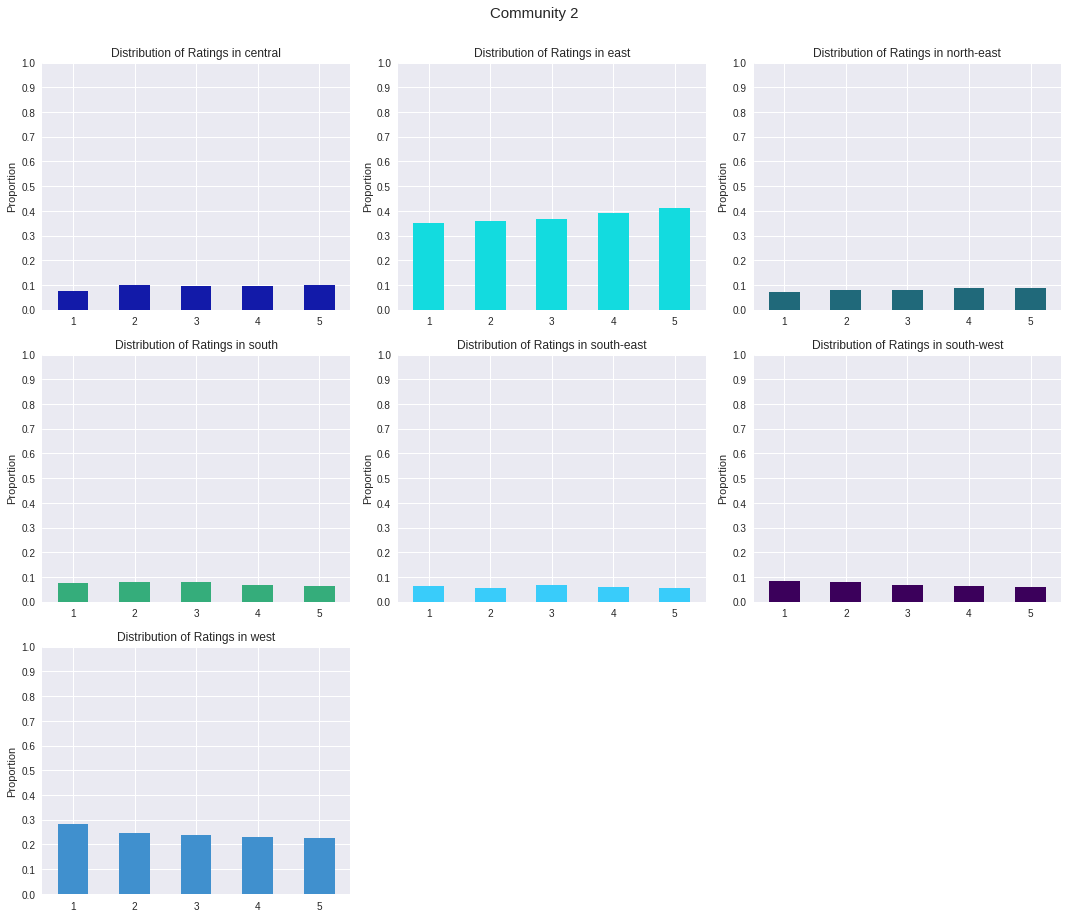

In [0]:
# Community 2
com2_ratings_areas = plot_rating_dist_over_var(com2_users_movies, "zip_code")

fig = plt.figure()
fig.suptitle("Community 2", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com2_ratings_areas.columns:
    com2_ratings_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Ratings in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1

# plt.ylim(0, 1, auto=False)
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

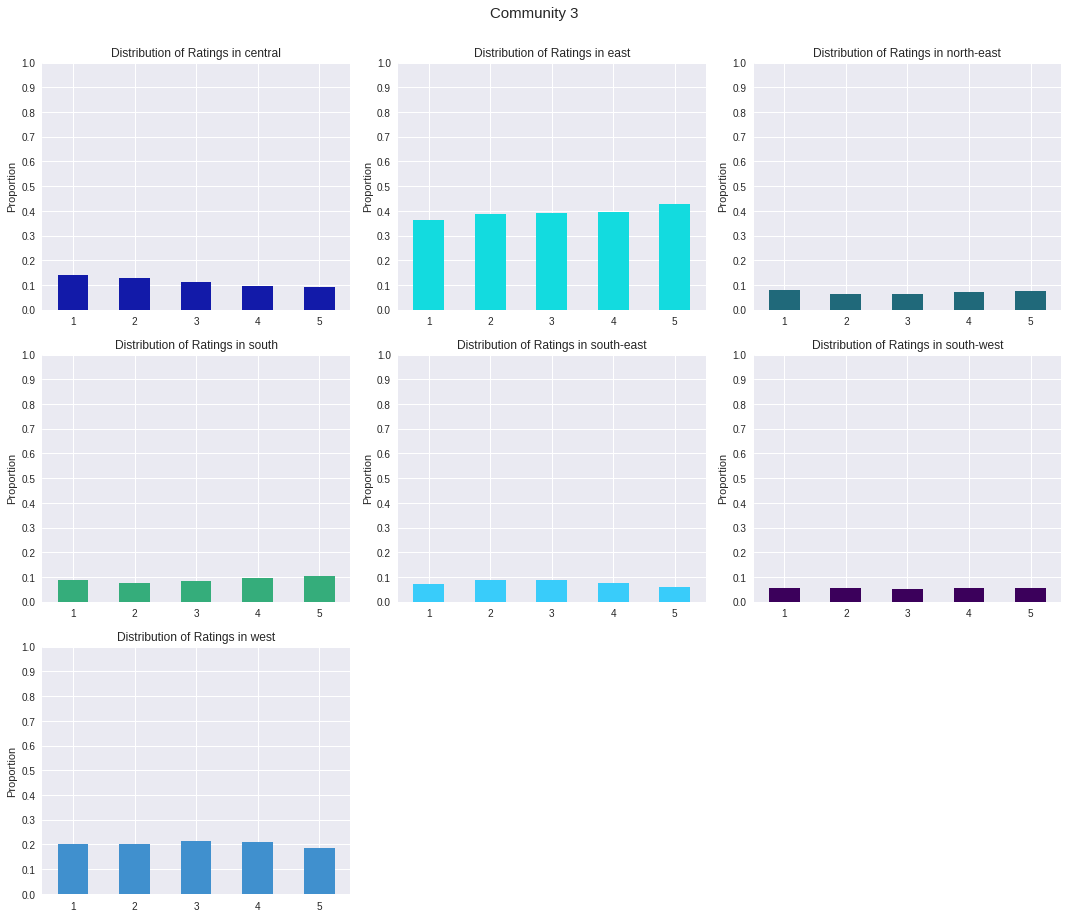

In [0]:
# Community 3
com3_ratings_areas = plot_rating_dist_over_var(com3_users_movies, "zip_code")

fig = plt.figure()
fig.suptitle("Community 3", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com3_ratings_areas.columns:
    com3_ratings_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Ratings in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1

# plt.ylim(0, 1, auto=False)
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

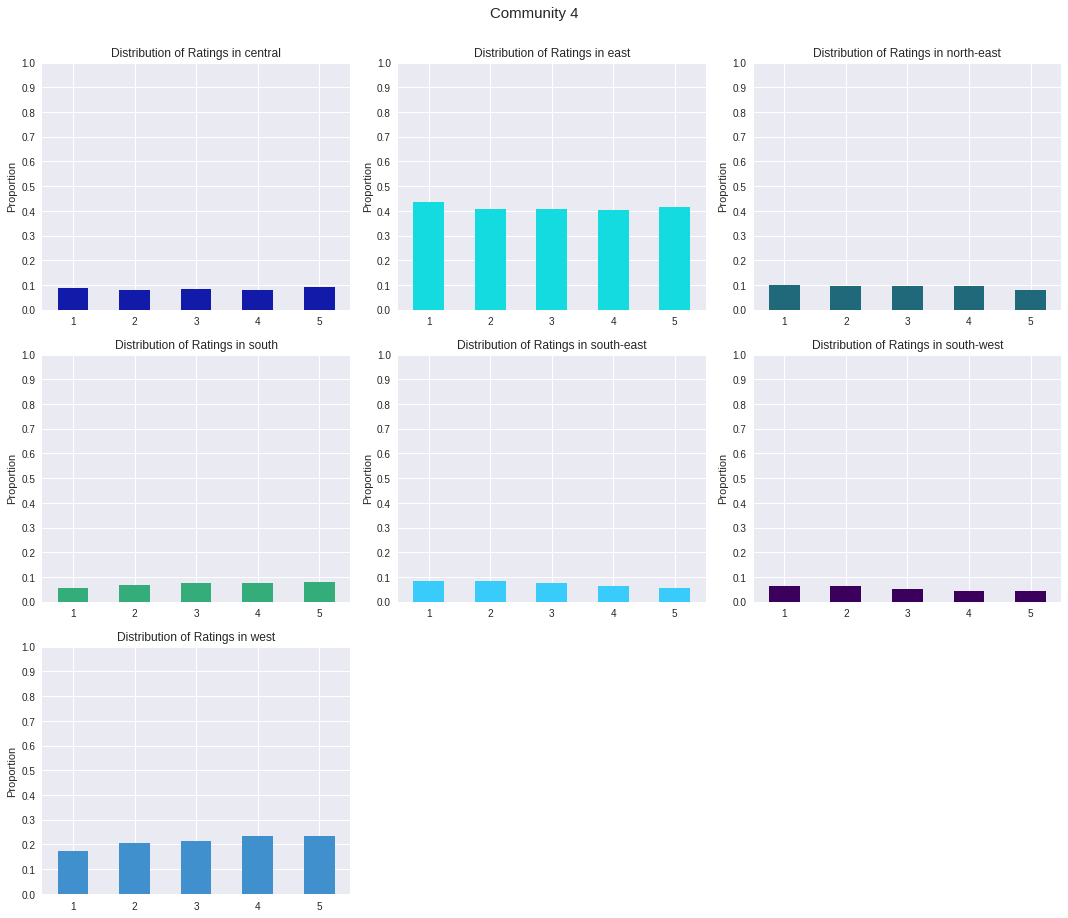

In [0]:
# Community 4
com4_ratings_areas = plot_rating_dist_over_var(com4_users_movies, "zip_code")

fig = plt.figure()
fig.suptitle("Community 4", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com4_ratings_areas.columns:
    com4_ratings_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Ratings in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1

# plt.ylim(0, 1, auto=False)
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

<div class="alert alert-block alert-info">
For residential regions, certain regions in a pair of community are found to be similar to each other. But when we compare them with it with the other pair of community, there is actually a difference. In community 1 and 4, audiences living in the East are more likely to give bad ratings of 1 star. While in community 2 and 3, the same group of audience are more likely to give good ratings of 5 stars.  

<br>
There are also differences between each communities. When we compare audiences living in the South, <br>
    <ul>
        <li>audiences from community 1 tends to give an equal distribution of each ratings </li>
        <li>audiences from community 2 tends to give bad ratings of 1 to 3 stars </li>
        <li>audiences from community 3 tends to give good ratings of 4 to 5 stars </li>
        <li>audiences from community 4 are less likely to give bad ratings of 1 star </li>
    </ul>
These observations lead us to conclude that <code>Residential Region</code> does have some differentiating power to uniquely identify each community.
</div>

#### Distribution of Ratings among Gender Groups

###### Male

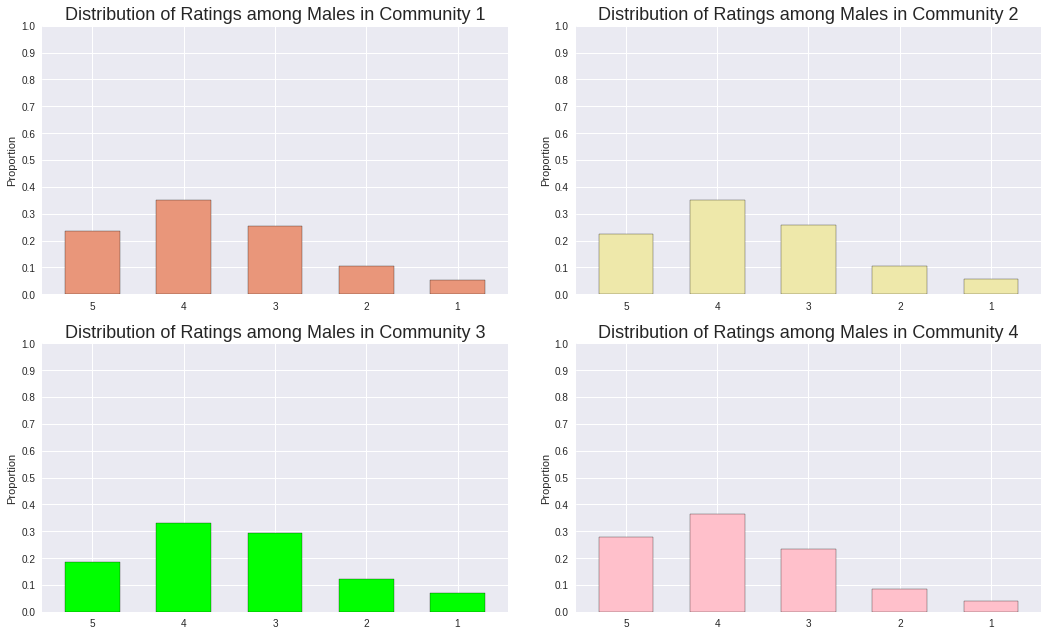

In [0]:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# community 1 gender distribution
com1_genres_gender_df = plot_rating_dist_over_var(com1_users_movies, "gender", "male")
com1_genres_gender_df.plot(kind="bar", 
                           color=color_list1[0], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax1,  
                           width=0.6, 
                           legend=False)
ax1.set_title("Distribution of Ratings among Males in Community 1", fontsize=18)
ax1.tick_params(axis='x', rotation=0)
ax1.set_ylabel("Proportion")
ax1.set_yticks(pl.frange(0, 1.0, 0.1))

# community 2 gender distribution
com2_genres_gender_df = plot_rating_dist_over_var(com2_users_movies, "gender", "male")
com2_genres_gender_df.plot(kind="bar", 
                           color=color_list1[1], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax2, 
                           width=0.6, 
                           legend=False)
ax2.set_title("Distribution of Ratings among Males in Community 2", fontsize=18)
ax2.tick_params(axis='x', rotation=0)
ax2.set_ylabel("Proportion")
ax2.set_yticks(pl.frange(0, 1.0, 0.1))

# community 3 gender distribution
com3_genres_gender_df = plot_rating_dist_over_var(com3_users_movies, "gender", "male")
com3_genres_gender_df.plot(kind="bar", 
                           color=color_list1[2], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax3, 
                           width=0.6, 
                           legend=False)
ax3.set_title("Distribution of Ratings among Males in Community 3", fontsize=18)
ax3.tick_params(axis='x', rotation=0)
ax3.set_ylabel("Proportion")
ax3.set_yticks(pl.frange(0, 1.0, 0.1))

# community 4 gender distribution
com4_genres_gender_df = plot_rating_dist_over_var(com4_users_movies, "gender", "male")
com4_genres_gender_df.plot(kind="bar", 
                           color=color_list1[3], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax4, 
                           width=0.6, 
                           legend=False)
ax4.set_title("Distribution of Ratings among Males in Community 4", fontsize=18)
ax4.tick_params(axis='x', rotation=0)
ax4.set_ylabel("Proportion")
ax4.set_yticks(pl.frange(0, 1.0, 0.1))


plt.tight_layout()
plt.show()

###### Female

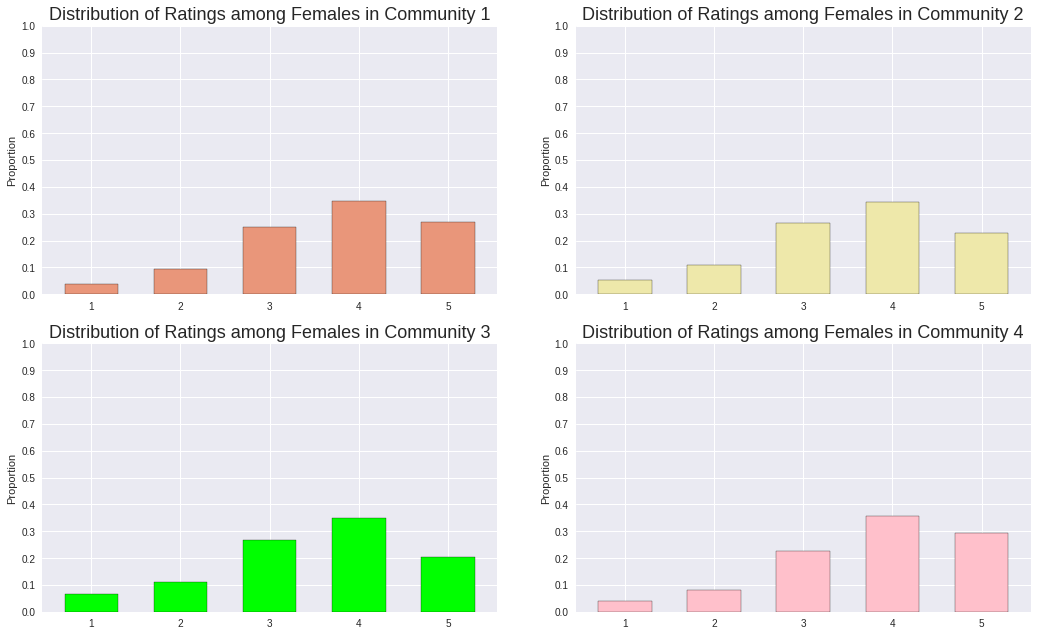

In [0]:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])


# community 1 gender distribution
com1_genres_gender_df = plot_rating_dist_over_var(com1_users_movies, "gender", "female")
com1_genres_gender_df.plot(kind="bar", 
                           color=color_list1[0], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax1, 
                           title="Distribution of Ratings among Females in Community 1", 
                           width=0.6, 
                           legend=False)
ax1.set_title("Distribution of Ratings among Females in Community 1", fontsize=18)
ax1.tick_params(axis='x', rotation=0)
ax1.set_ylabel("Proportion")
ax1.set_yticks(pl.frange(0, 1.0, 0.1))


# community 2 gender distribution
com2_genres_gender_df = plot_rating_dist_over_var(com2_users_movies, "gender", "female")
com2_genres_gender_df.plot(kind="bar", 
                           color=color_list1[1], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax2, 
                           title="Distribution of Ratings among Females in Community 2", 
                           width=0.6, 
                           legend=False)
ax2.set_title("Distribution of Ratings among Females in Community 2", fontsize=18)
ax2.tick_params(axis='x', rotation=0)
ax2.set_ylabel("Proportion")
ax2.set_yticks(pl.frange(0, 1.0, 0.1))


# community 3 gender distribution
com3_genres_gender_df = plot_rating_dist_over_var(com3_users_movies, "gender", "female")
com3_genres_gender_df.plot(kind="bar", 
                           color=color_list1[2], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax3,  
                           width=0.6, 
                           legend=False)
ax3.set_title("Distribution of Ratings among Females in Community 3", fontsize=18)
ax3.tick_params(axis='x', rotation=0)
ax3.set_ylabel("Proportion")
ax3.set_yticks(pl.frange(0, 1.0, 0.1))


# community 4 gender distribution
com4_genres_gender_df = plot_rating_dist_over_var(com4_users_movies, "gender", "female")
com4_genres_gender_df.plot(kind="bar", 
                           color=color_list1[3], 
                           edgecolor="black", 
                           figsize=[15,9], 
                           ax=ax4,  
                           width=0.6, 
                           legend=False)
ax4.set_title("Distribution of Ratings among Females in Community 4", fontsize=18)
ax4.tick_params(axis='x', rotation=0)
ax4.set_ylabel("Proportion")
ax4.set_yticks(pl.frange(0, 1.0, 0.1))


plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
All 4 communities follow the same distribution for both gender types. Furthermore, this distribution follows that of the population. Thus, we can conclude that *Gender* does not have any differentiating power to identify each communities. 
</div>

#### Summary for User Demographics

<div class="alert alert-block alert-info">
    In conclusion, while <code>*Gender*</code> does not have any differentiating power to uniquly identify each community, the other 3 variables <code>*Age*</code>, <code>*Occupation*</code> and <code>*Residential Region*</code> do have slight differentiating power as we can see minor differences between the communities for certain responses. 
</div>

### 2.3 Genres (for ratings 1 and 5)

#### Distribution of Genres among Age Groups

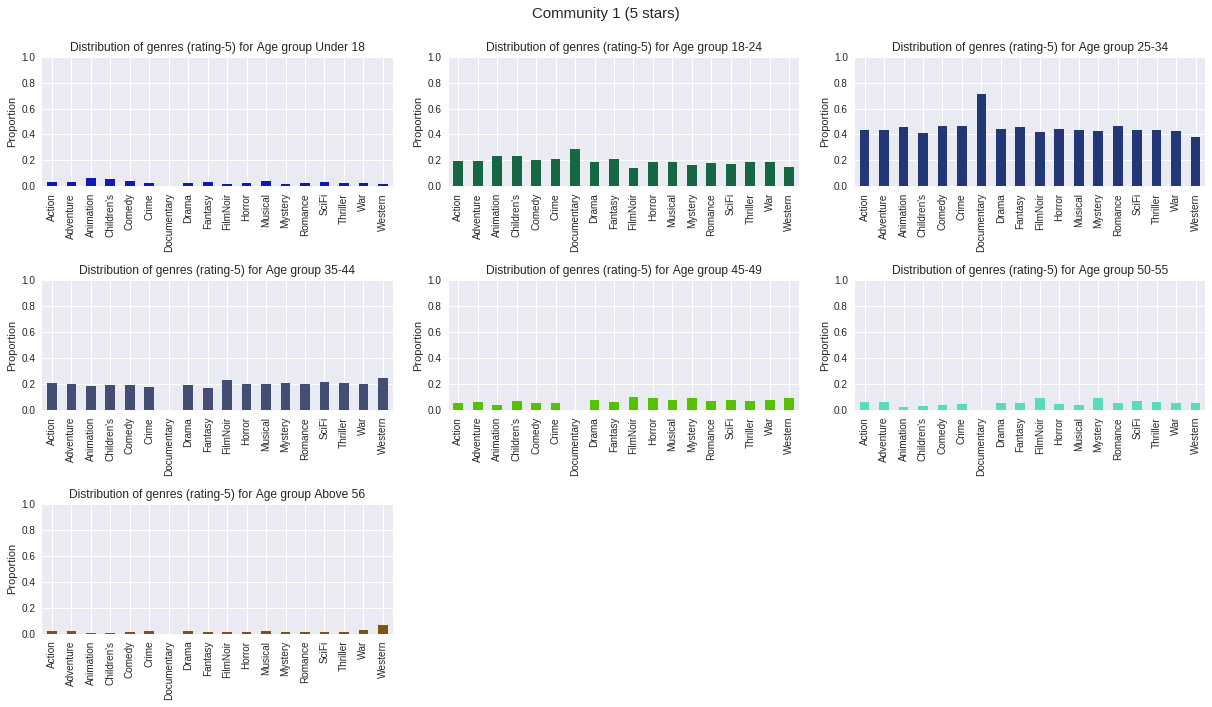

In [0]:
# Community 1 (5 stars)

fig = plt.figure()
fig.suptitle("Community 1 (5 stars)", fontsize = 15)

# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com1_genres_age_df = plot_genre_dist_over_var(com1_users_movies_ratings_5, 1, "age")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com1_genres_age_df.columns.values)):
    
    ax = com1_genres_age_df[com1_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                  title = "Distribution of genres (rating-5) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

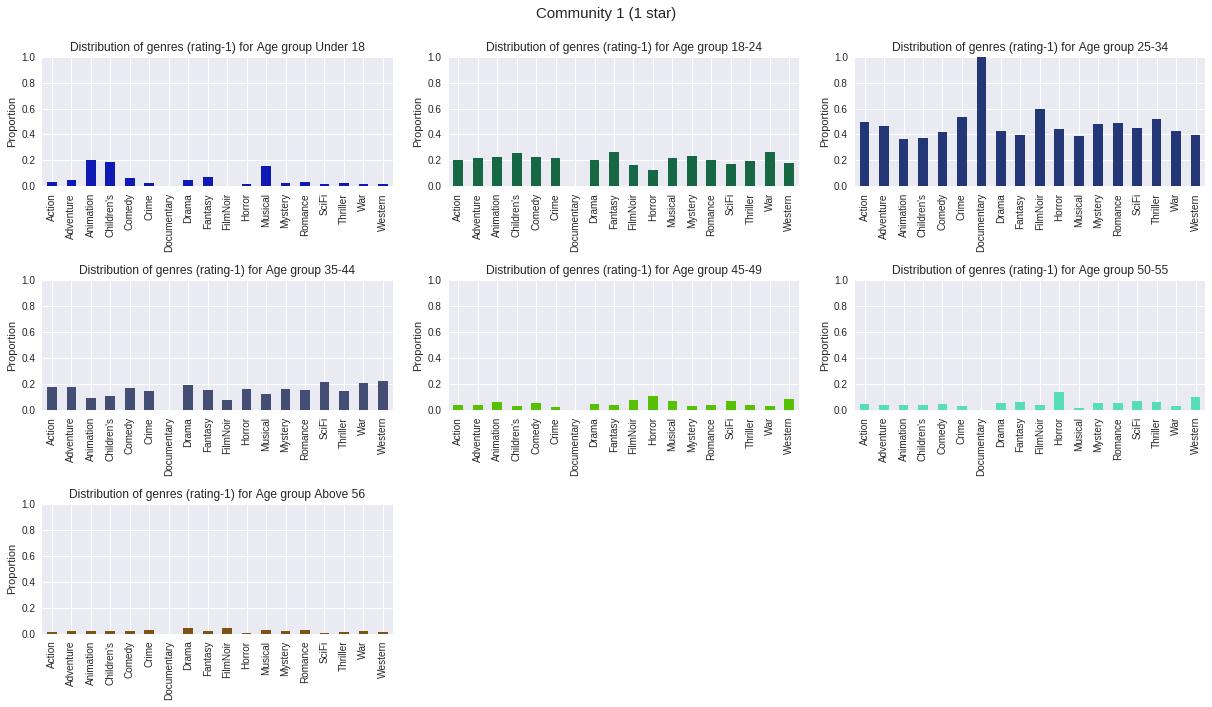

In [0]:
# Community 1 (1 star)

fig = plt.figure()
fig.suptitle("Community 1 (1 star)", fontsize = 15)

# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com1_genres_age_df = plot_genre_dist_over_var(com1_users_movies_ratings_1, 1, "age")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com1_genres_age_df.columns.values)):
    
    ax = com1_genres_age_df[com1_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                  title = "Distribution of genres (rating-1) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

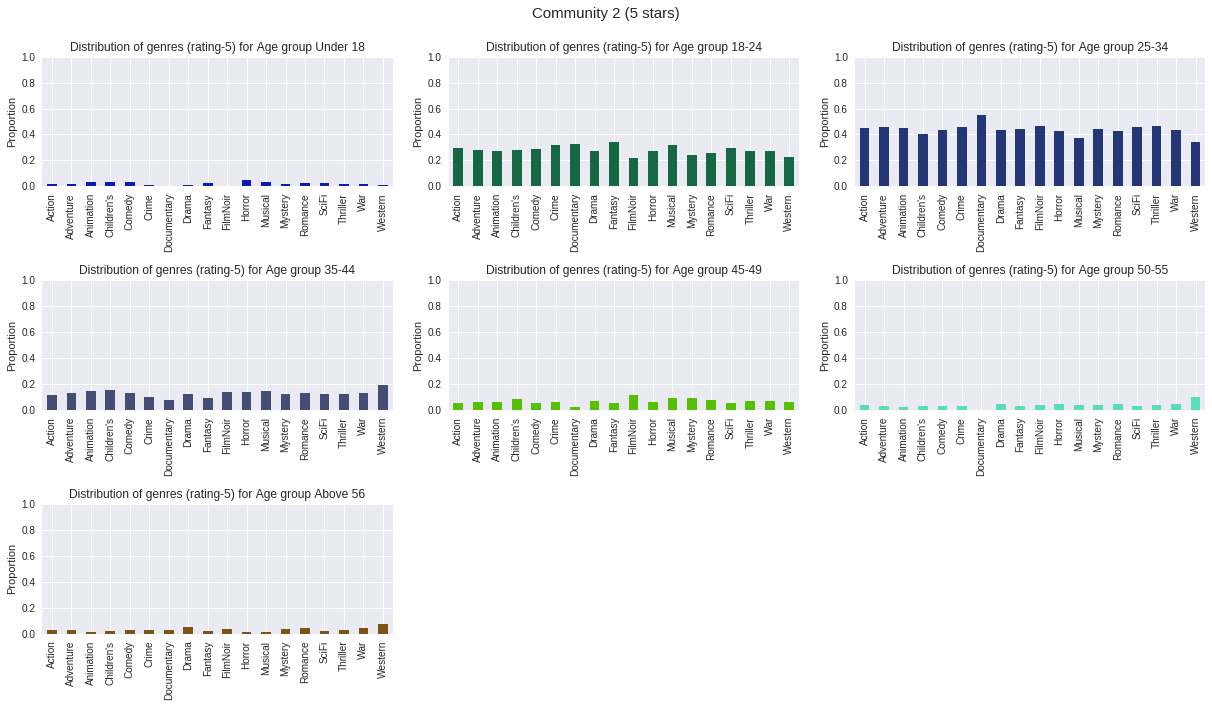

In [0]:
# Community 2 (5 stars)

fig = plt.figure()
fig.suptitle("Community 2 (5 stars)", fontsize = 15)

# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com2_genres_age_df = plot_genre_dist_over_var(com2_users_movies_ratings_5, 2, "age")

# plot each age group in its own subplot
for idx in range(len(com2_genres_age_df.columns.values)):
    
    ax = com2_genres_age_df[com2_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), 
                                                                  title = "Distribution of genres (rating-5) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

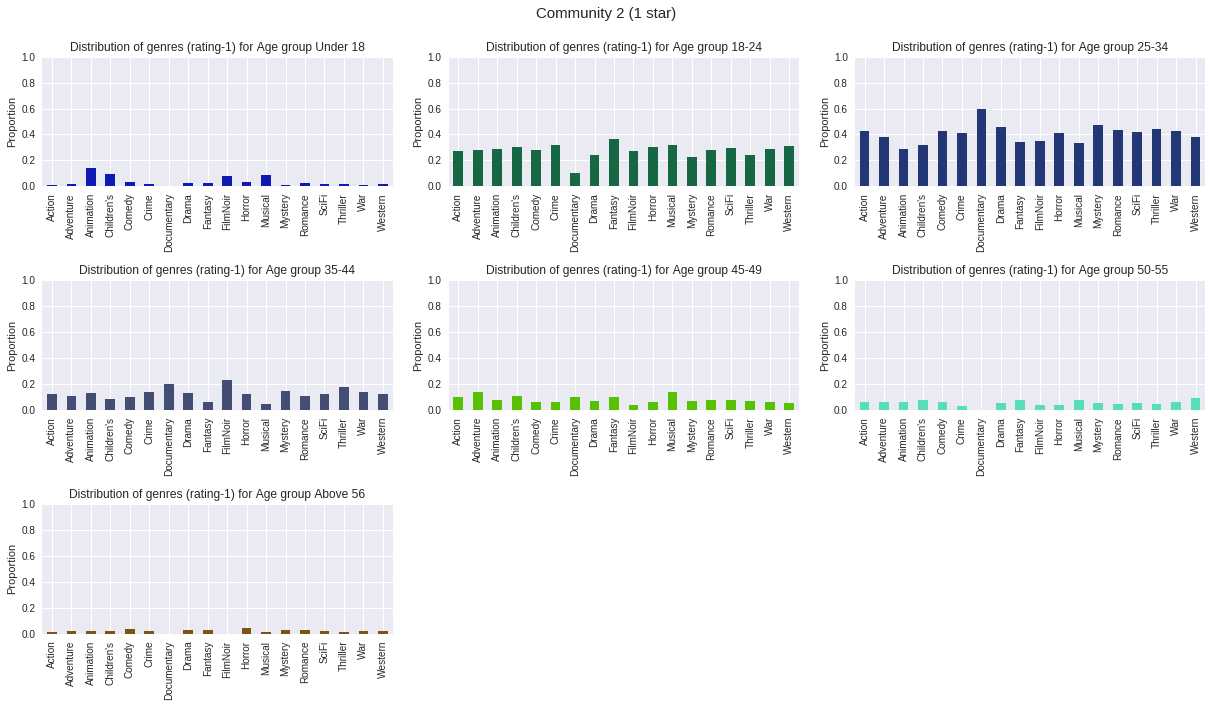

In [0]:
# Community 2 (1 star)

fig = plt.figure()
fig.suptitle("Community 2 (1 star)", fontsize = 15)

# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com2_genres_age_df = plot_genre_dist_over_var(com2_users_movies_ratings_1, 2, "age")

# plot each age group in its own subplot
for idx in range(len(com2_genres_age_df.columns.values)):
    
    ax = com2_genres_age_df[com2_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), 
                                                                  title = "Distribution of genres (rating-1) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

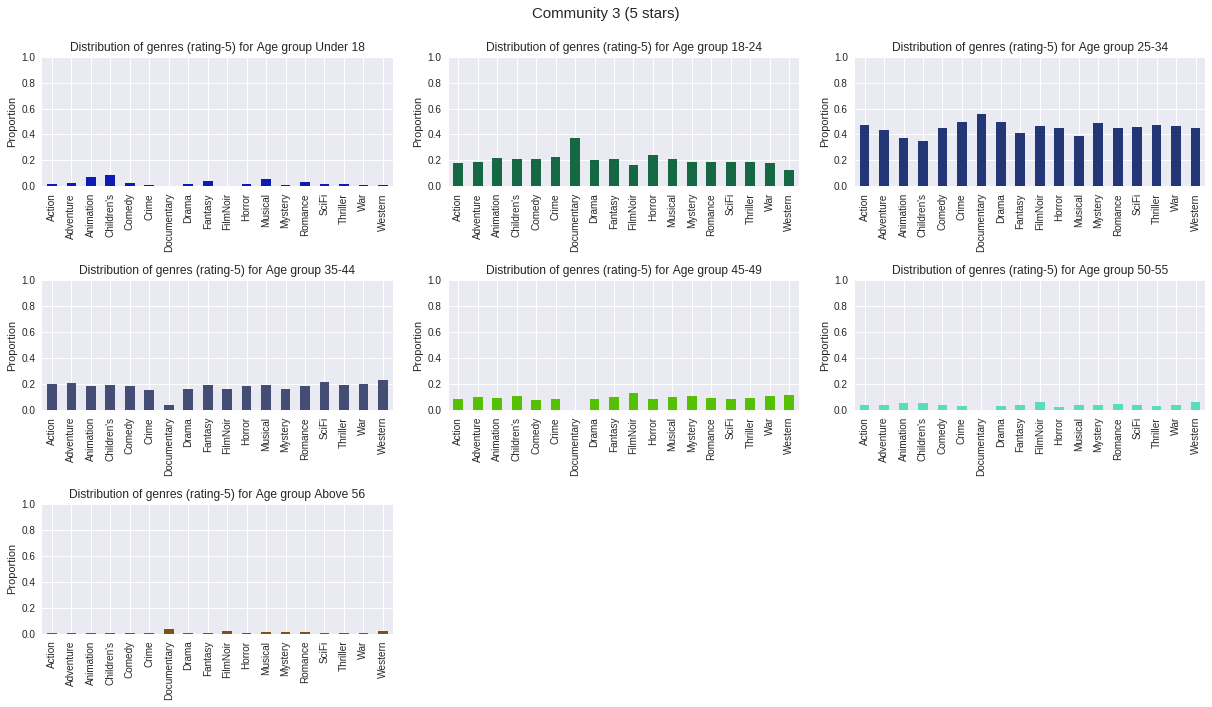

In [0]:
# Community 3 (5 stars)

fig = plt.figure()
fig.suptitle("Community 3 (5 stars)", fontsize = 15)

# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com3_genres_age_df = plot_genre_dist_over_var(com3_users_movies_ratings_5, 3, "age")

# plot each age group in its own subplot
for idx in range(len(com3_genres_age_df.columns.values)):
    
    ax = com3_genres_age_df[com3_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), 
                                                                  title = "Distribution of genres (rating-5) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

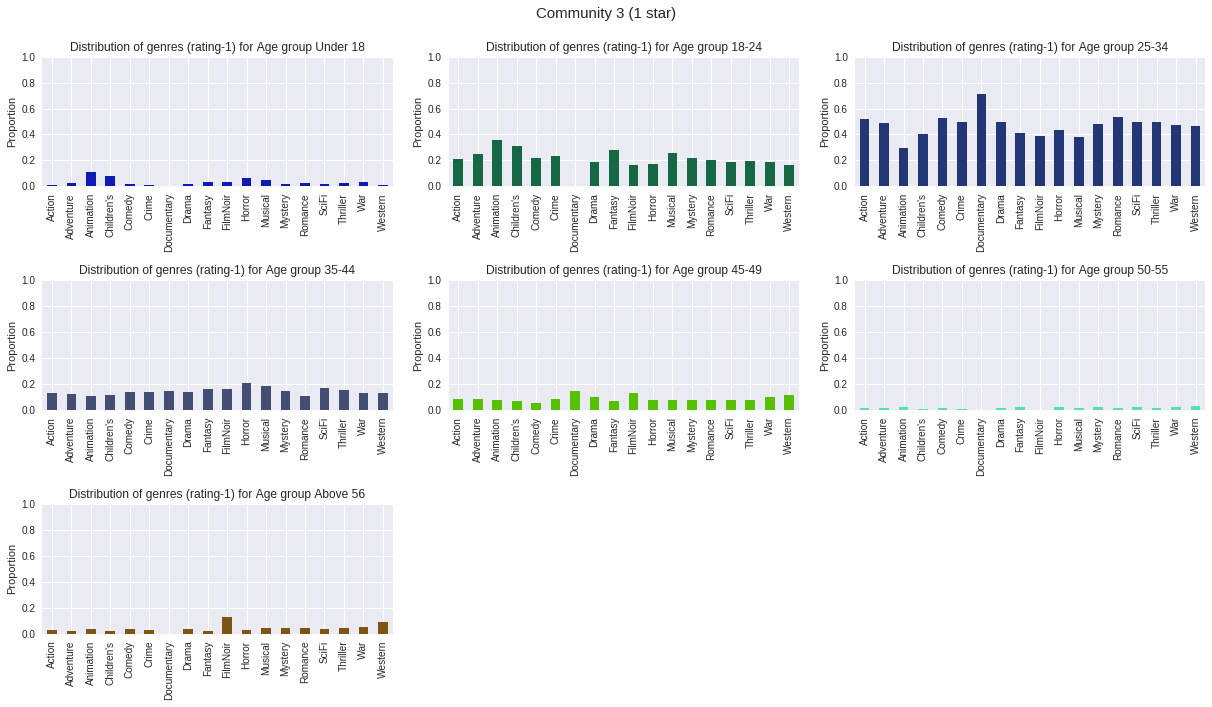

In [0]:
# Community 3 (1 star)

fig = plt.figure()
fig.suptitle("Community 3 (1 star)", fontsize = 15)

# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com3_genres_age_df = plot_genre_dist_over_var(com3_users_movies_ratings_1, 3, "age")

# plot each age group in its own subplot
for idx in range(len(com3_genres_age_df.columns.values)):
    
    ax = com3_genres_age_df[com3_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), 
                                                                  title = "Distribution of genres (rating-1) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

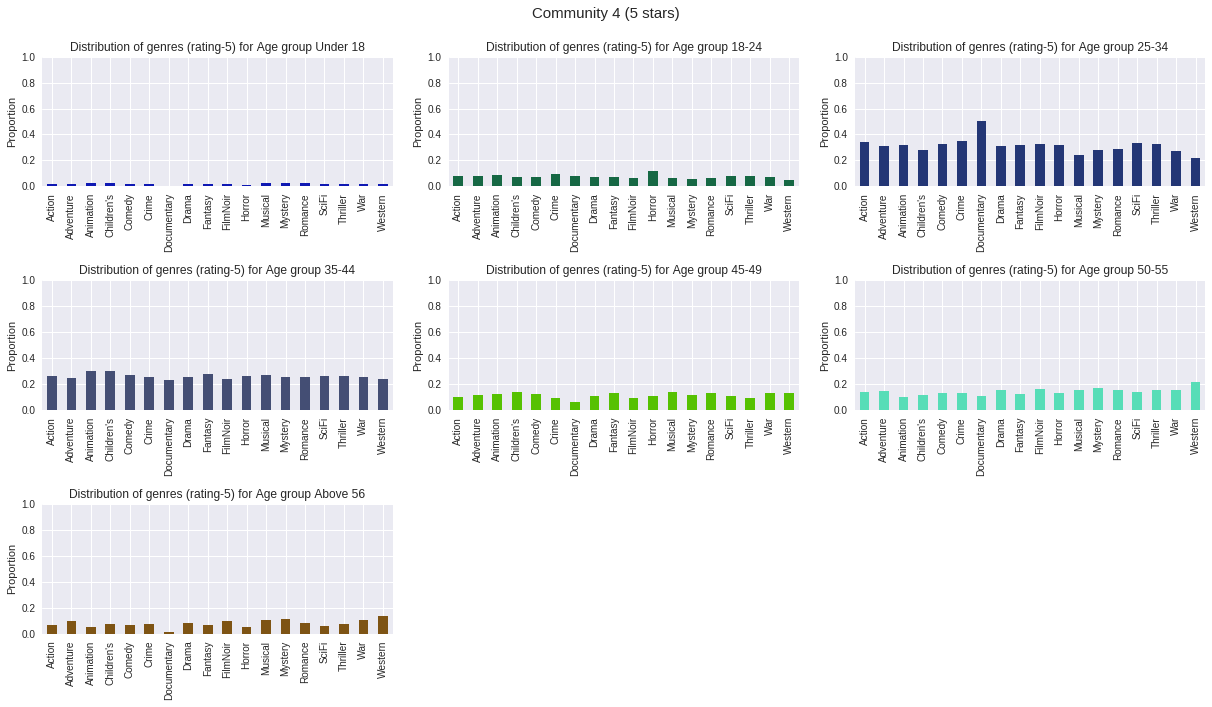

In [0]:
# Community 4 (5 stars)

fig = plt.figure()
fig.suptitle("Community 4 (5 stars)", fontsize = 15)
# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com4_genres_age_df = plot_genre_dist_over_var(com4_users_movies_ratings_5, 4, "age")

# plot each age group in its own subplot
for idx in range(len(com4_genres_age_df.columns.values)):
    
    ax = com4_genres_age_df[com4_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), 
                                                                  title = "Distribution of genres (rating-5) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

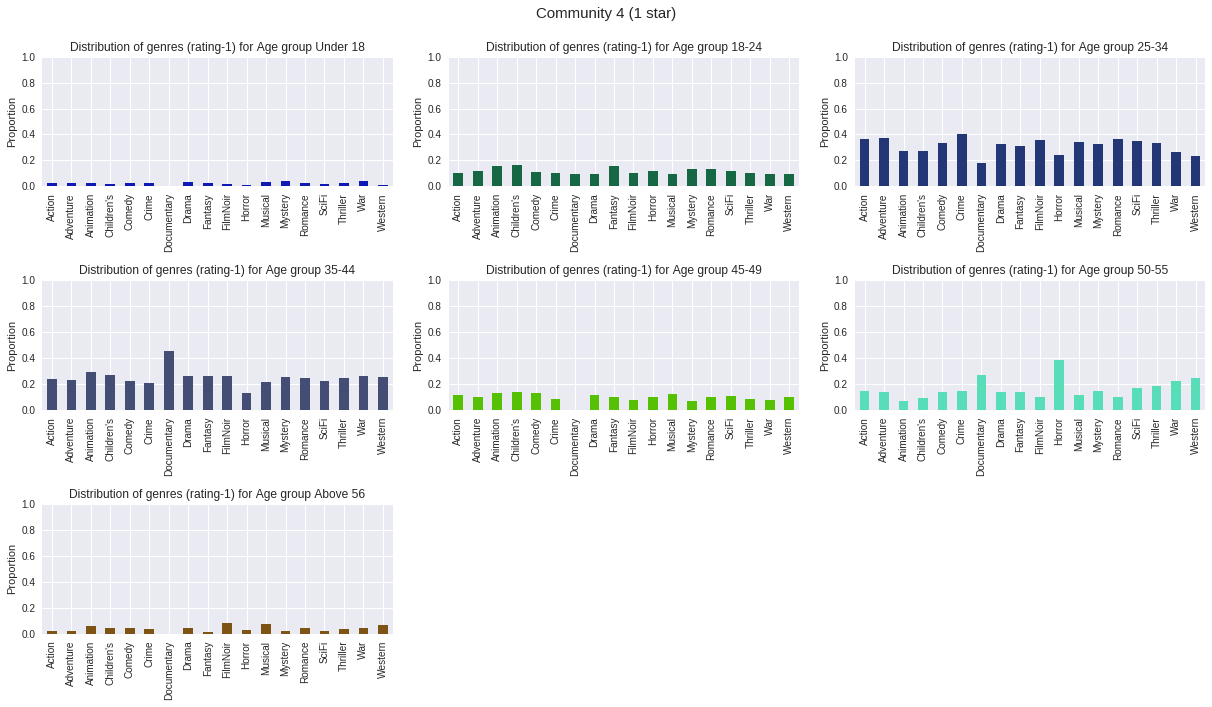

In [0]:
# Community 4 (1 star)

fig = plt.figure()
fig.suptitle("Community 4 (1 star)", fontsize = 15)
# initial subplots area
gs = gridspec.GridSpec(3, 3)

# community's distribution of genres over each age group 
com4_genres_age_df = plot_genre_dist_over_var(com4_users_movies_ratings_1, 4, "age")

# plot each age group in its own subplot
for idx in range(len(com4_genres_age_df.columns.values)):
    
    ax = com4_genres_age_df[com4_genres_age_df.columns[idx]].plot(kind="bar", 
                                                                  color=color_list2[idx],
                                                                  figsize = [17,10],
                                                                  ax = plt.subplot(gs[idx]), 
                                                                  title = "Distribution of genres (rating-1) for Age group %s" %age_dict[com1_genres_age_df.columns[idx]]
                                                                 )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-info">
In general, we see that <code>Documentary</code> tends to be the best rated genre in all communities, in particularly by audiences aged 25 to 34 years old. While most age groups (above 35 years old) have similar preference for the best rated genre in each community (*Western*, *Film-Noir*, *Western*, *Documentary*), we see the opposite happening in the worst rated genres list. That is audience who are below age 35 have similar dislikes. These audiences dislike mainly *Animation*, *Fantasy* and *Documentary* genres.   
<br> 
These differences seems to suggest that <code>Age</code> does have an influence on the preferences of audiences. 
</div>

#### Distribution of Genres among top 3 Occupations 

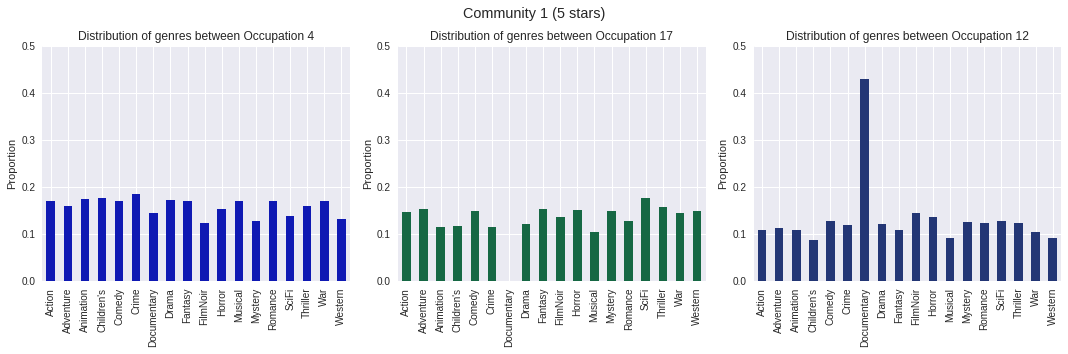

In [0]:
# community 1 (5 stars)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com1_users_movies_ratings_5, 1, "occupation")

fig = plt.figure()
fig.suptitle("Community 1 (5 stars)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx]) # assigns the subplot to current occupation
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

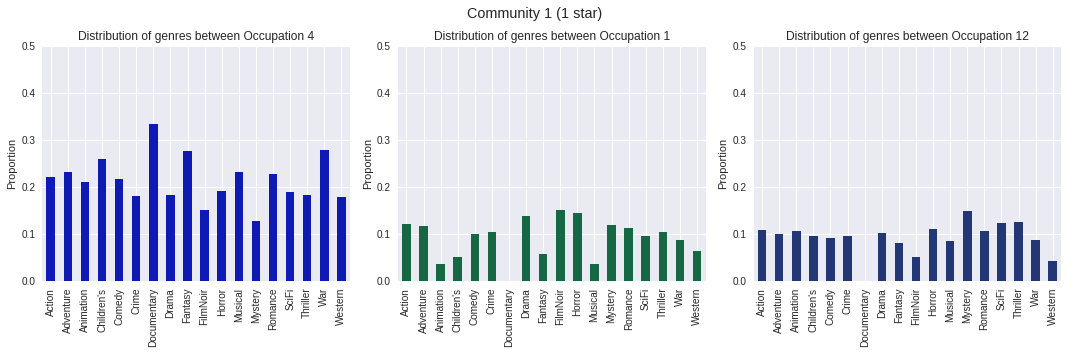

In [0]:
# community 1 (1 star)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com1_users_movies_ratings_1, 1, "occupation")

fig = plt.figure()
fig.suptitle("Community 1 (1 star)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx]) # assigns the subplot to current occupation
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

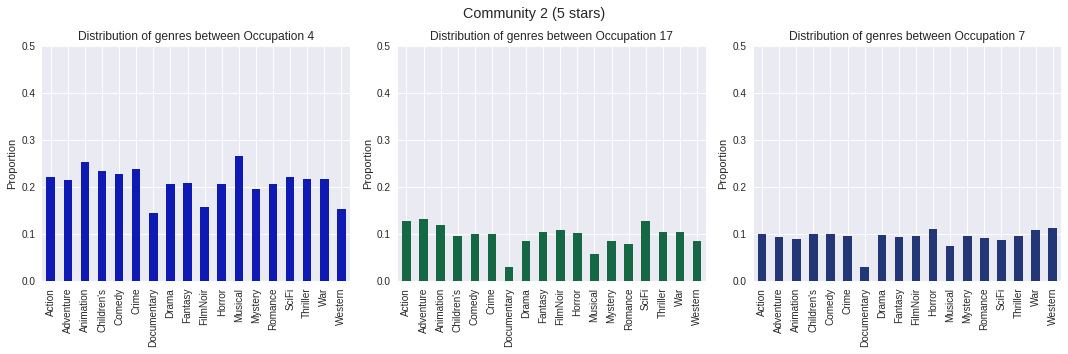

In [0]:
# community 2 (5 stars)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com2_users_movies_ratings_5, 2, "occupation")

fig = plt.figure()
fig.suptitle("Community 2 (5 stars)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx])
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

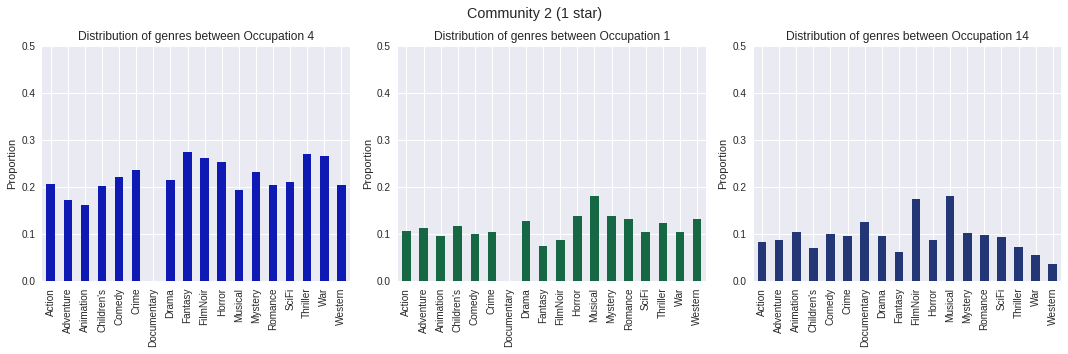

In [0]:
# community 2 (1 star)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com2_users_movies_ratings_1, 2, "occupation")

fig = plt.figure()
fig.suptitle("Community 2 (1 star)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx])
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

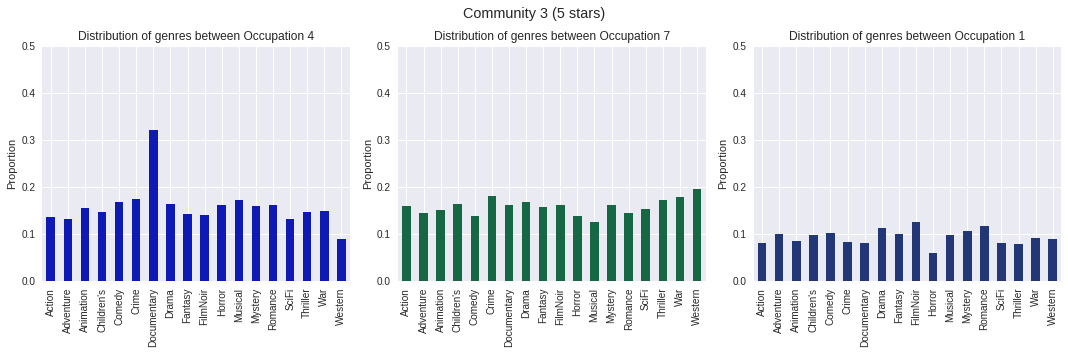

In [0]:
# community 3 (5 stars)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com3_users_movies_ratings_5, 3, "occupation")

fig = plt.figure()
fig.suptitle("Community 3 (5 stars)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx])
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

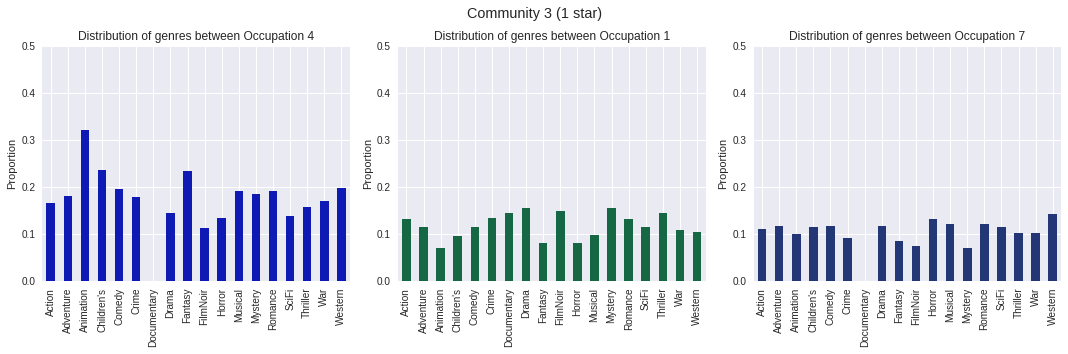

In [0]:
# community 3 (1 stars)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com3_users_movies_ratings_1, 3, "occupation")

fig = plt.figure()
fig.suptitle("Community 3 (1 star)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx])
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

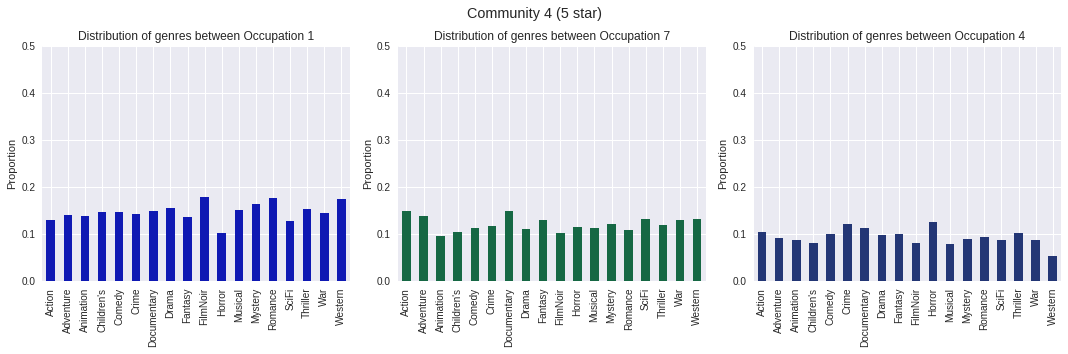

In [0]:
# community 4 (5 stars)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com4_users_movies_ratings_5, 4, "occupation")

fig = plt.figure()
fig.suptitle("Community 4 (5 star)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx])
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

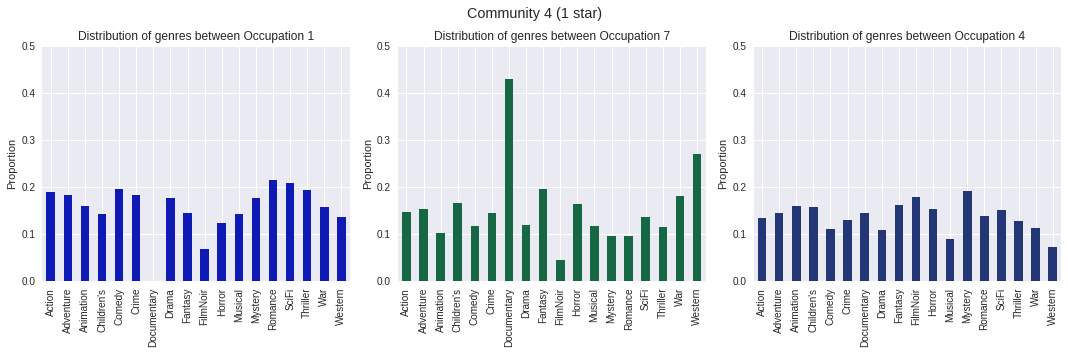

In [0]:
# community 4 (1 stars)
com_occupation, occupations_genres_df_percen = plot_genre_dist_over_var(com4_users_movies_ratings_1, 4, "occupation")

fig = plt.figure()
fig.suptitle("Community 4 (1 star)")
gs = gridspec.GridSpec(1,3)

for idx in range(len(com_occupation)):
    ax = occupations_genres_df_percen.T.loc[com_occupation[idx][0],].plot(kind="bar", color=color_list2[idx],
                                                                          figsize = [15,5],
                                                                          ax = plt.subplot(gs[idx])
                                                                         )
    ax.set_title("Distribution of genres between Occupation %s" %(str(com_occupation[idx][0])))
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 0.5, auto=True)

gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-info">
There are a few things observed here. <br>
<ol>
    <li>Community 1 and 2 have a distinct top occupation for both best and worst rated movies.</li>
    <li>Each occupation in each community has a different best/worst rated genre</li>
    <li>The distributions of genres are different for each community-occupation-rating combination</li>
</ol>
    
These observations points that <code>*Occupation*</code> does have an influence on the audience preferences. 
</div>

#### Distribution of Genres among Regions

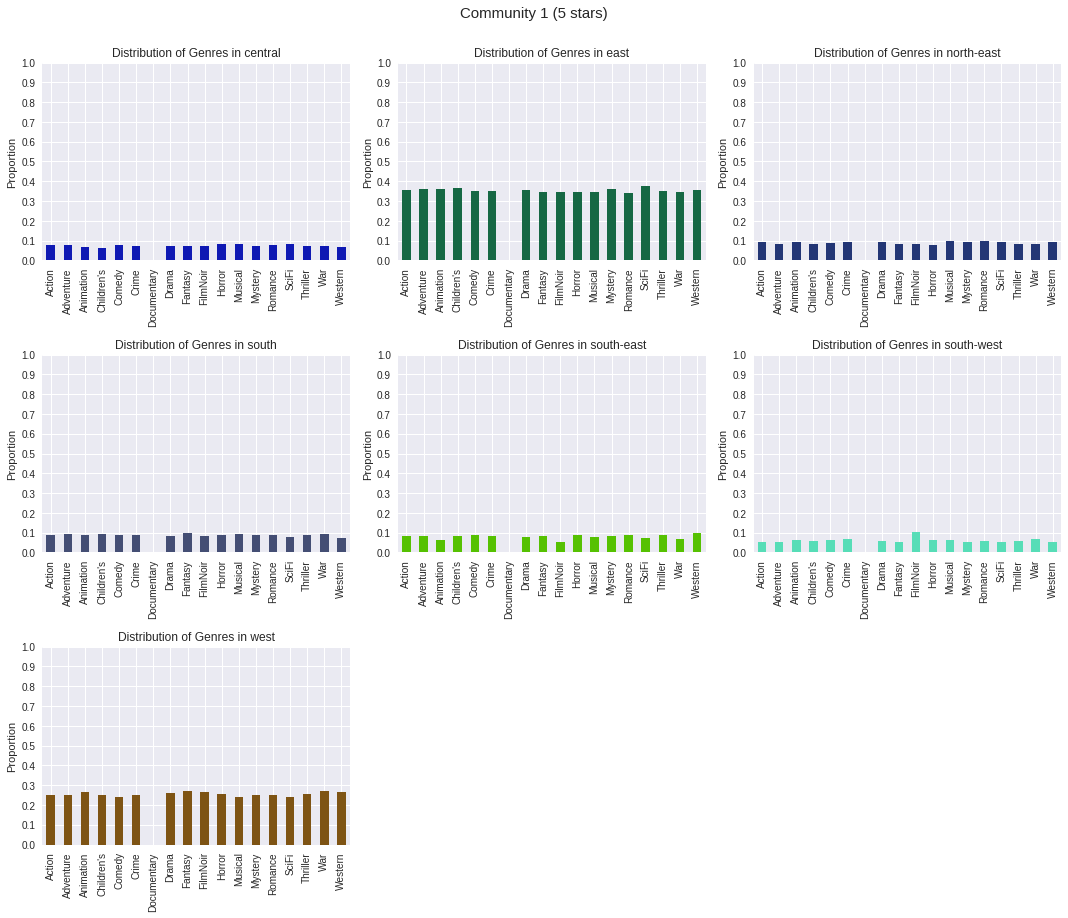

In [0]:
# Community 1 (5 stars)
com1_genres_areas = plot_genre_dist_over_var(com1_users_movies_ratings_5, 1, "zip_code")

fig = plt.figure()
fig.suptitle("Community 1 (5 stars)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com1_genres_areas.columns:
    com1_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1

# plt.ylim(0, 1, auto=False)
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

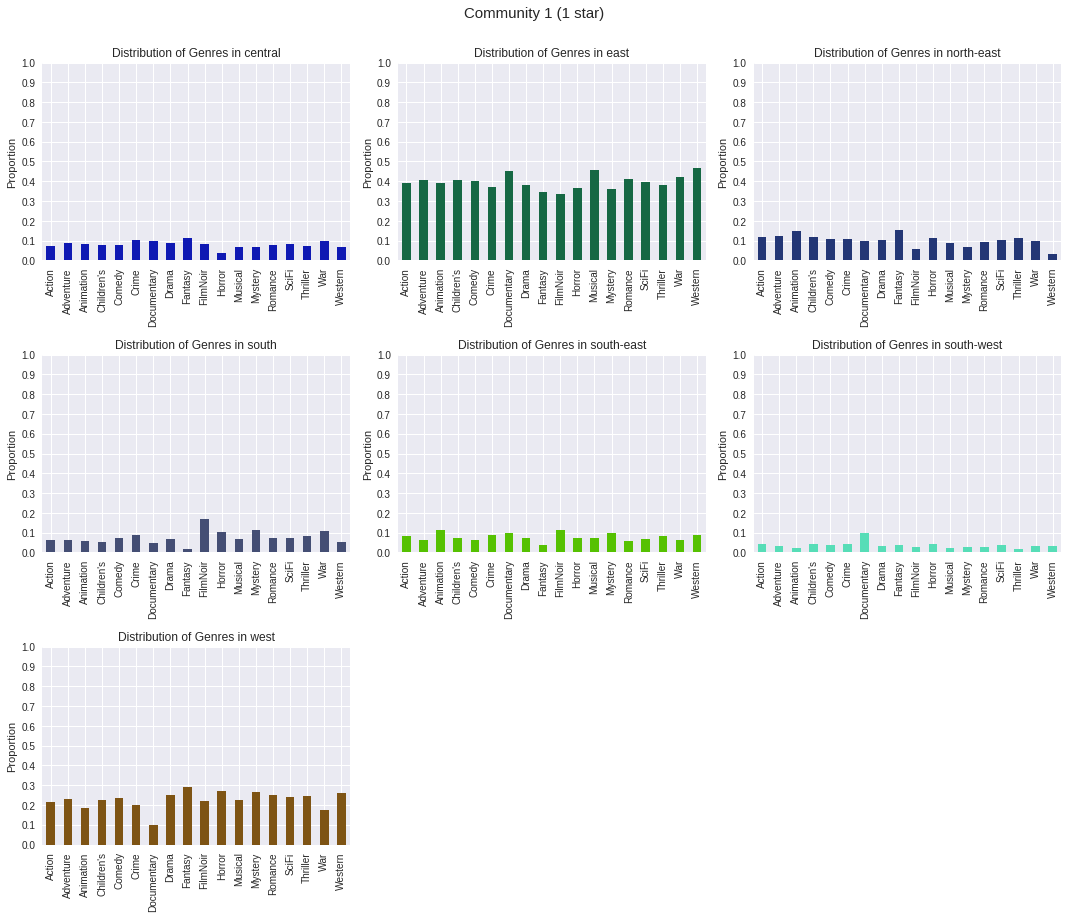

In [0]:
# Community 1 (1 stars)
com1_genres_areas = plot_genre_dist_over_var(com1_users_movies_ratings_1, 1, "zip_code")

fig = plt.figure()
fig.suptitle("Community 1 (1 star)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com1_genres_areas.columns:
    com1_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1

# plt.ylim(0, 1, auto=False)
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

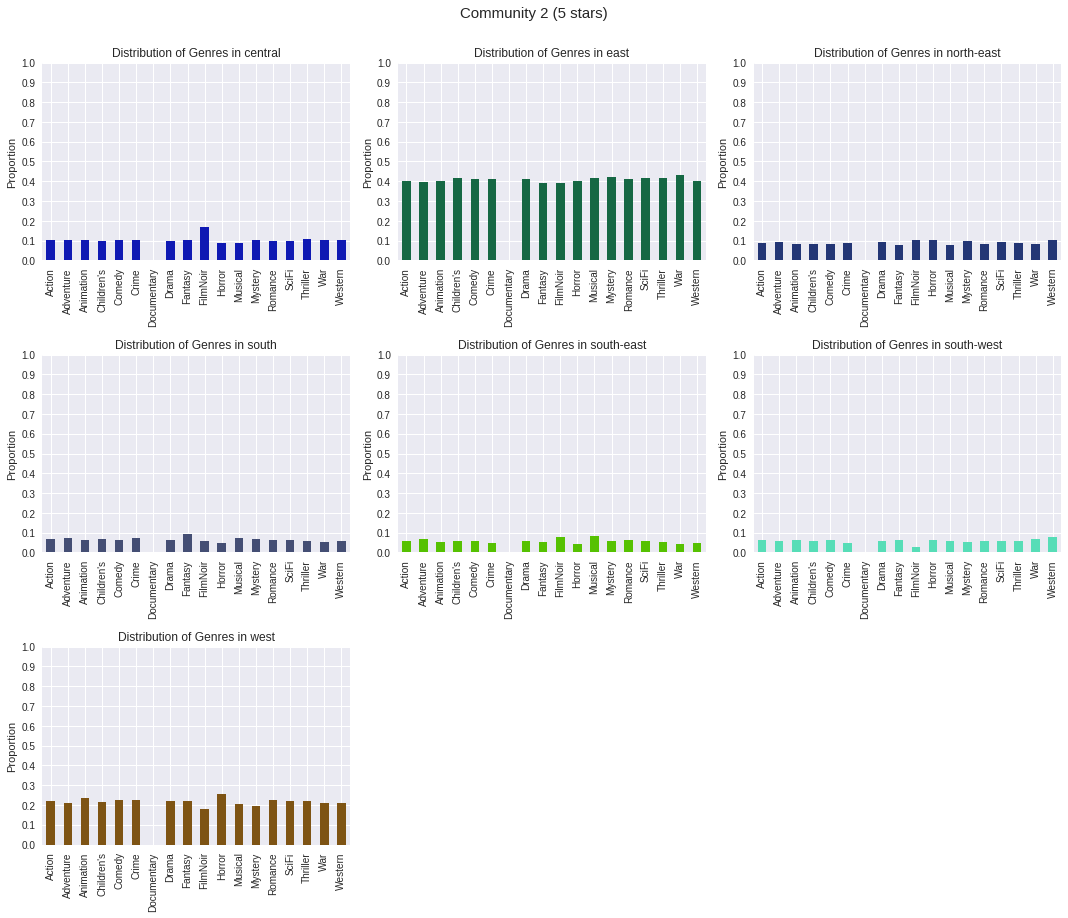

In [0]:
# Community 2 (5 stars)
com2_genres_areas = plot_genre_dist_over_var(com2_users_movies_ratings_5, 2, "zip_code")

fig = plt.figure()
fig.suptitle("Community 2 (5 stars)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com2_genres_areas.columns:
    com2_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

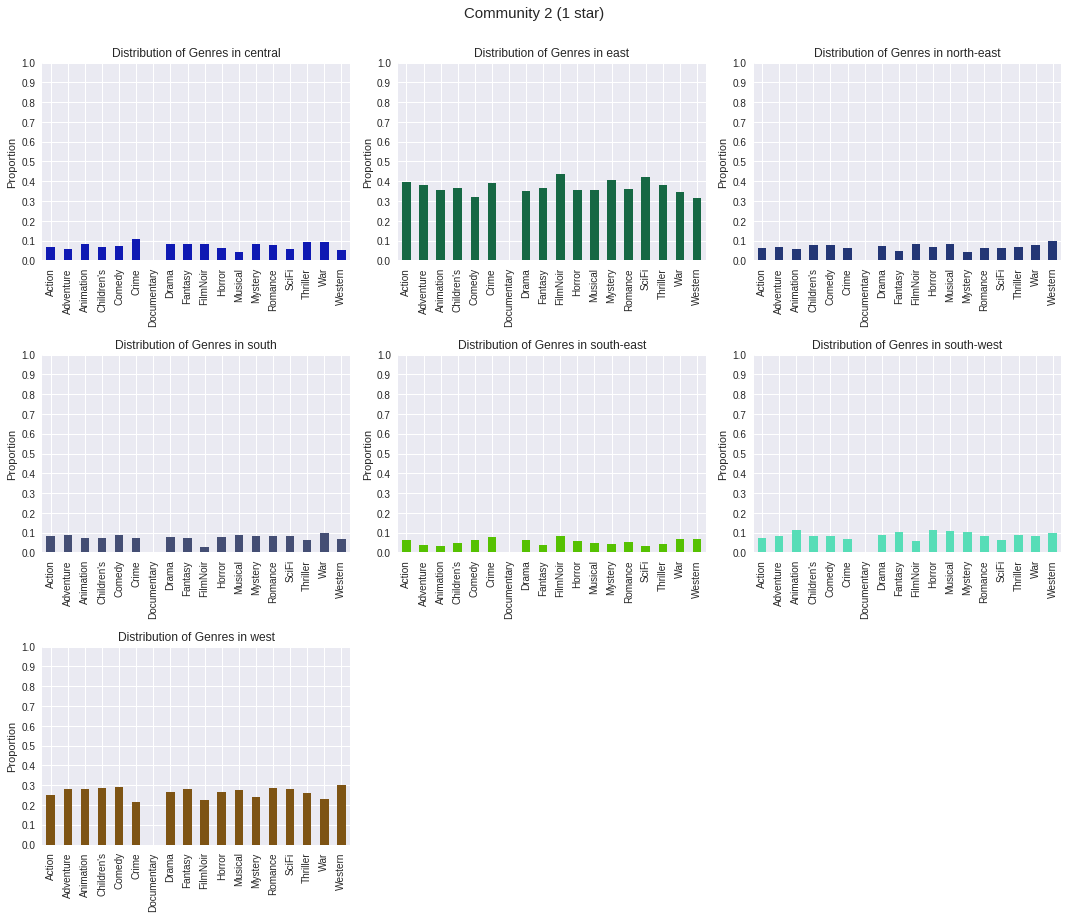

In [0]:
# Community 2 (1 stars)
com2_genres_areas = plot_genre_dist_over_var(com2_users_movies_ratings_1, 2, "zip_code")

fig = plt.figure()
fig.suptitle("Community 2 (1 star)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com2_genres_areas.columns:
    com2_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

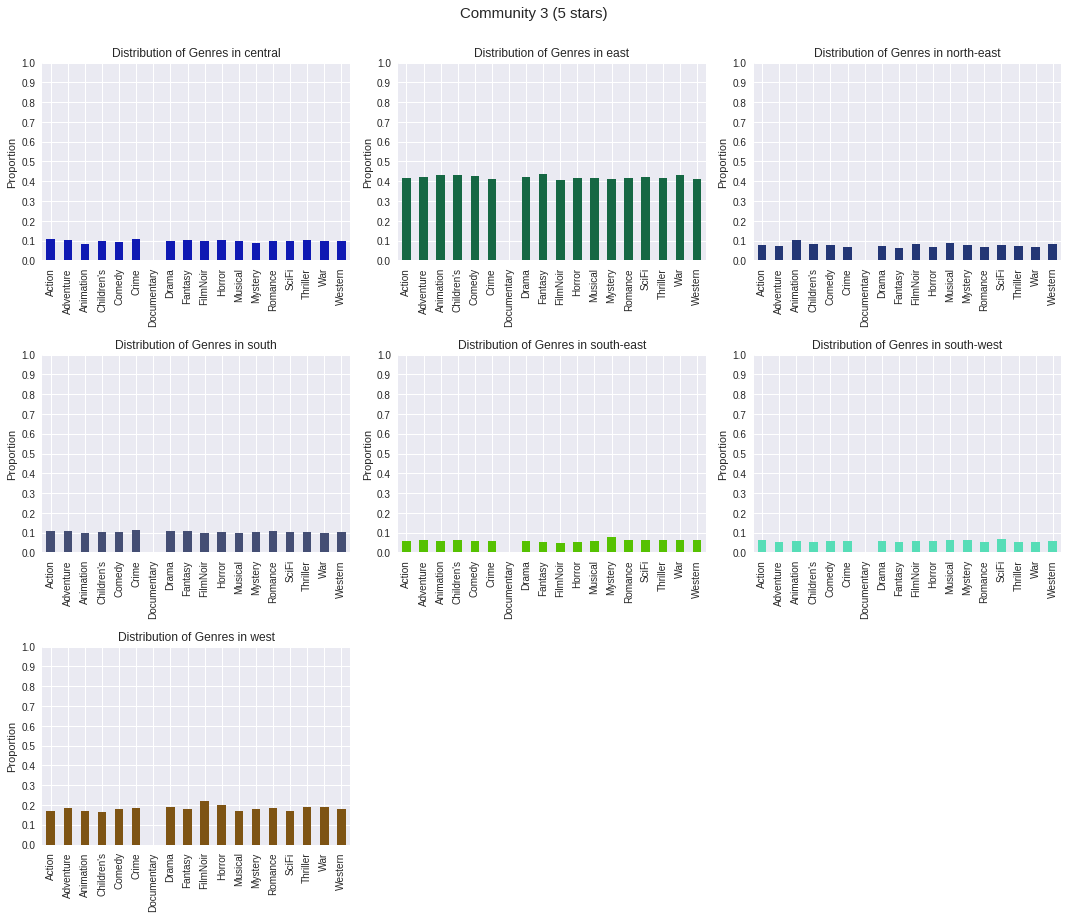

In [0]:
# Community 3 (5 stars)
com3_genres_areas = plot_genre_dist_over_var(com3_users_movies_ratings_5, 3, "zip_code")

fig = plt.figure()
fig.suptitle("Community 3 (5 stars)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com3_genres_areas.columns:
    com3_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

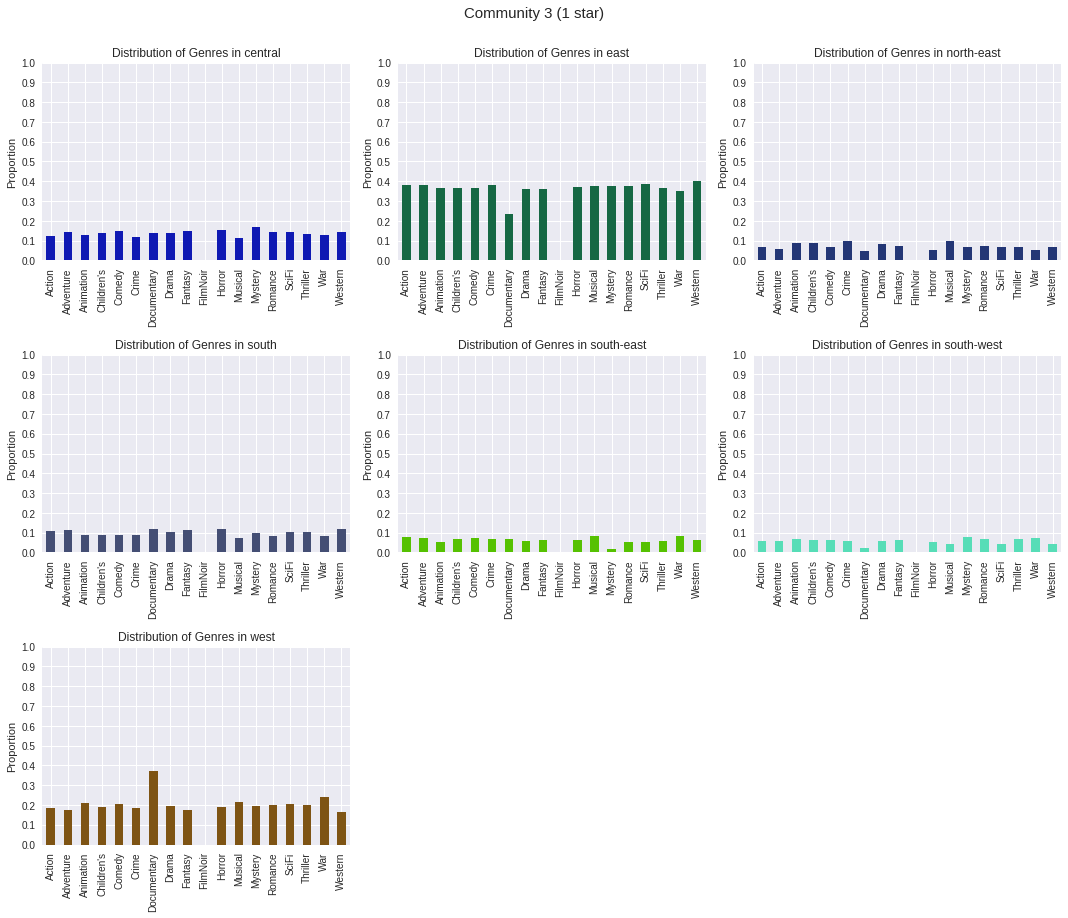

In [0]:
# Community 3 (1 stars)
com3_genres_areas = plot_genre_dist_over_var(com3_users_movies_ratings_1, 3, "zip_code")

fig = plt.figure()
fig.suptitle("Community 3 (1 star)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com3_genres_areas.columns:
    com3_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

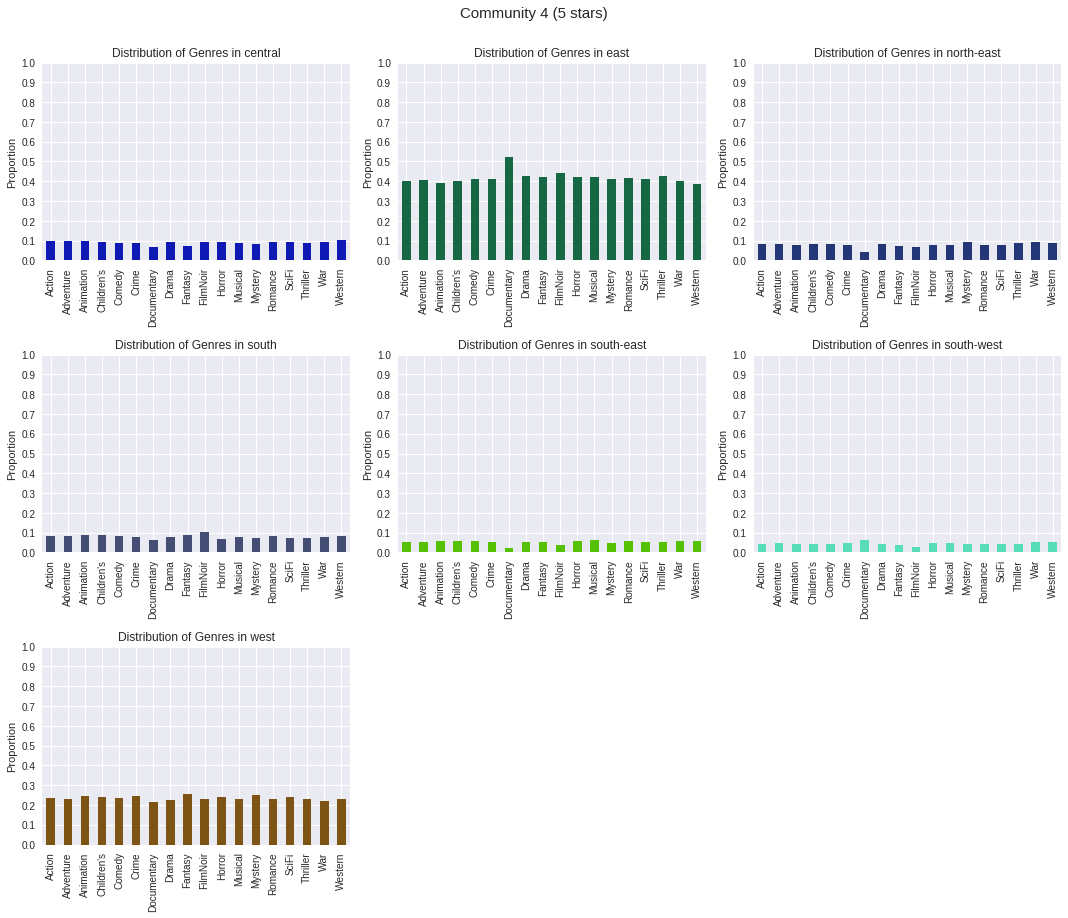

In [0]:
# Community 4 (5 stars)
com4_genres_areas = plot_genre_dist_over_var(com4_users_movies_ratings_5, 4, "zip_code")

fig = plt.figure()
fig.suptitle("Community 4 (5 stars)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com4_genres_areas.columns:
    com4_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

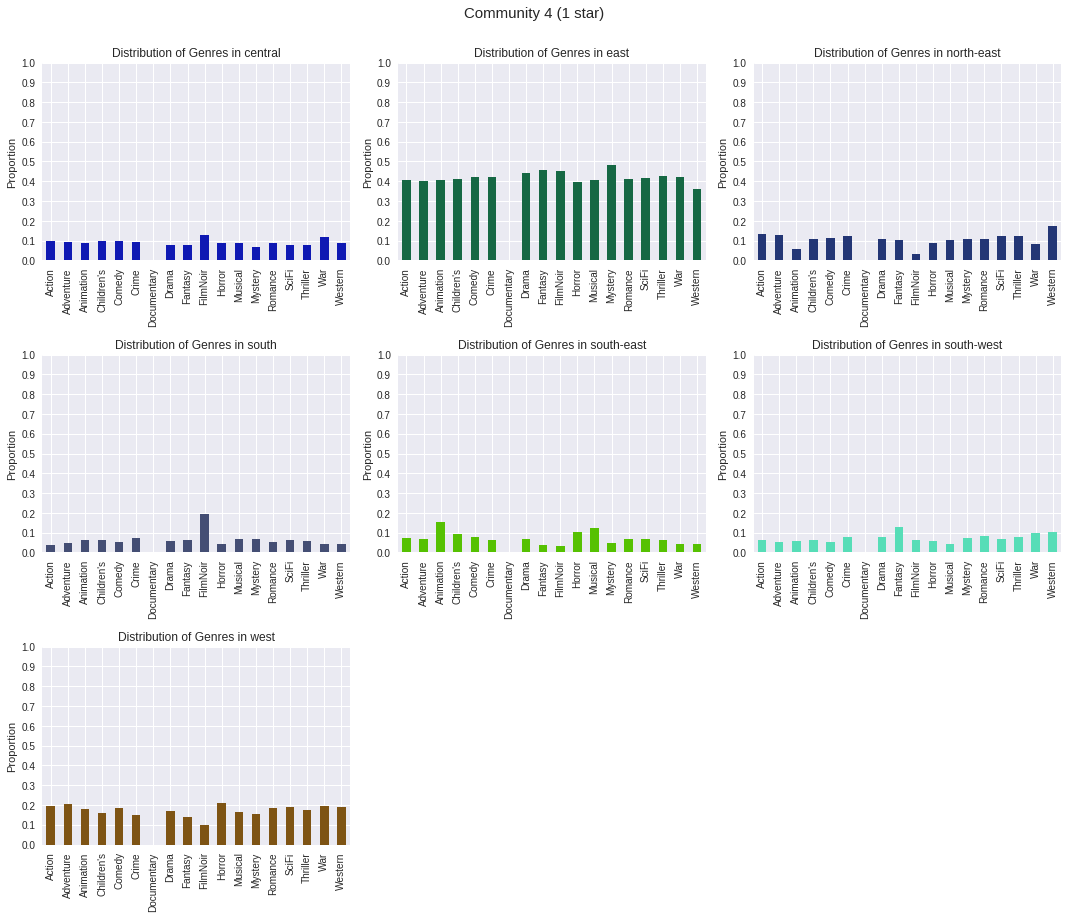

In [0]:
# Community 4 (1 stars)
com4_genres_areas = plot_genre_dist_over_var(com4_users_movies_ratings_1, 4, "zip_code")

fig = plt.figure()
fig.suptitle("Community 4 (1 star)", fontsize=15)

gs = gridspec.GridSpec(3,3)
idx = 0

for area in com4_genres_areas.columns:
    com4_genres_areas[area].plot(kind="bar",
                                 figsize=[15,13], 
                                 title="Distribution of Genres in %s" %area, 
                                 ax=plt.subplot(gs[idx]), 
                                 color=color_list2[idx])
    plt.ylabel("Proportion")
    plt.yticks(pl.frange(0, 1, 0.1))
    idx+=1
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])

<div class="alert alert-block alert-info">
The following events were observed. 
<ol>
    <li>Distribution of genres for best rated movies are almost evenly distributed for all regions in each community. </li>
    <li>Distinct genres for each region in each community for worst rated movies.</li>
</ol>

These observations implies that <code>Residential Regions</code> have an influence in the preferences of the audiences for worst rated genres but not for best rated genres.  
</div>

#### Distribution of Genres among Gender groups

##### Community 1

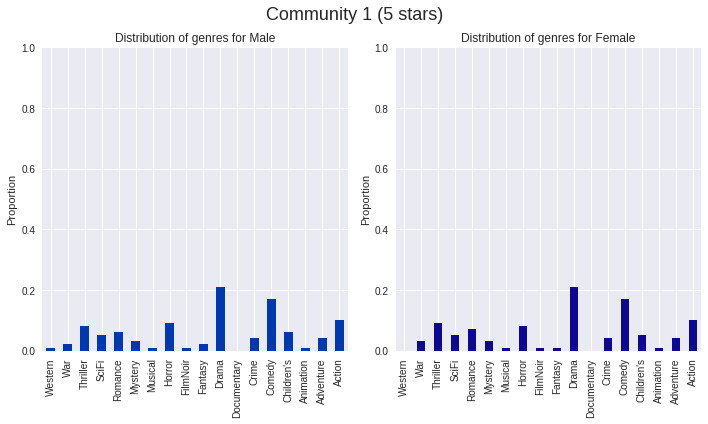

In [0]:
# Community 1 (5 stars)

fig = plt.figure()
fig.suptitle("Community 1 (5 stars)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com1_genres_gender_df = plot_genre_dist_over_var(com1_users_movies_ratings_5, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com1_genres_gender_df.columns.values)):
    
    ax = com1_genres_gender_df[com1_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com1_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

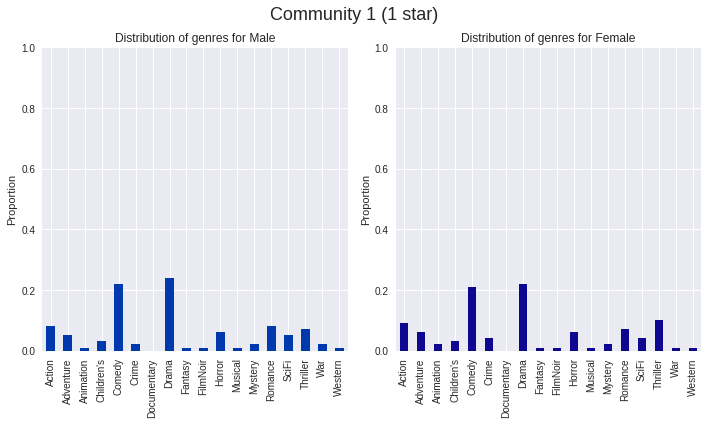

In [0]:
# Community 1 (1 stars)

fig = plt.figure()
fig.suptitle("Community 1 (1 star)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com1_genres_gender_df = plot_genre_dist_over_var(com1_users_movies_ratings_1, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com1_genres_gender_df.columns.values)):
    
    ax = com1_genres_gender_df[com1_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com1_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

##### Community 2

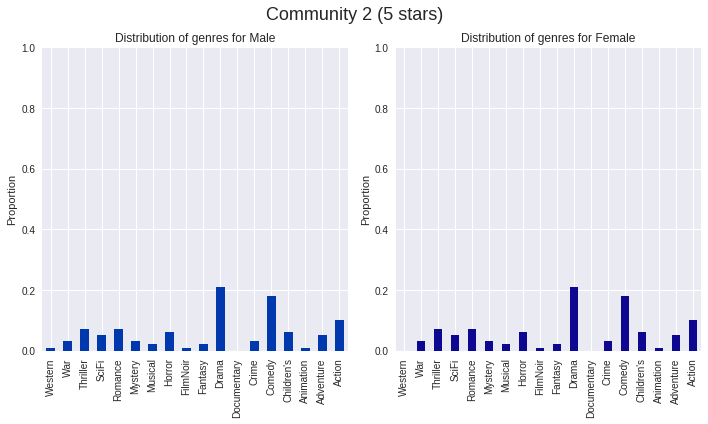

In [0]:
# Community 2 (5 stars)

fig = plt.figure()
fig.suptitle("Community 2 (5 stars)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com2_genres_gender_df = plot_genre_dist_over_var(com2_users_movies_ratings_5, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com2_genres_gender_df.columns.values)):
    
    ax = com2_genres_gender_df[com2_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com2_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

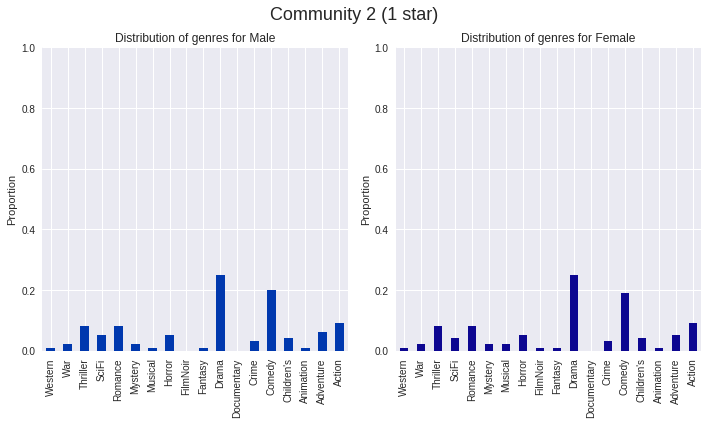

In [0]:
# Community 2 (1 stars)

fig = plt.figure()
fig.suptitle("Community 2 (1 star)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com2_genres_gender_df = plot_genre_dist_over_var(com2_users_movies_ratings_1, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com2_genres_gender_df.columns.values)):
    
    ax = com2_genres_gender_df[com2_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com2_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

##### Community 3

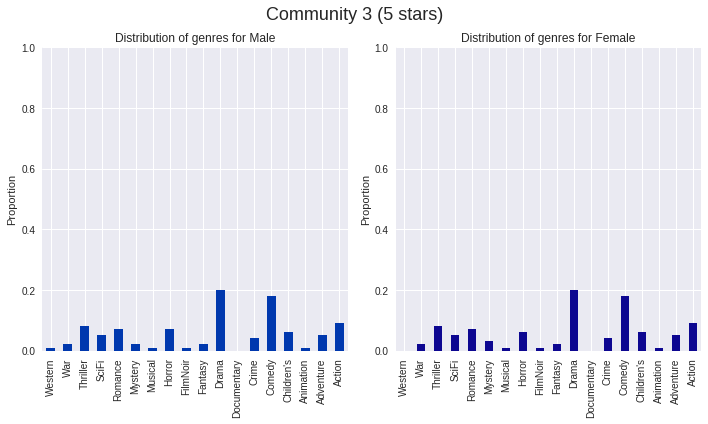

In [0]:
# Community 3 (5 stars)

fig = plt.figure()
fig.suptitle("Community 3 (5 stars)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com3_genres_gender_df = plot_genre_dist_over_var(com3_users_movies_ratings_5, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com3_genres_gender_df.columns.values)):
    
    ax = com3_genres_gender_df[com3_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com3_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

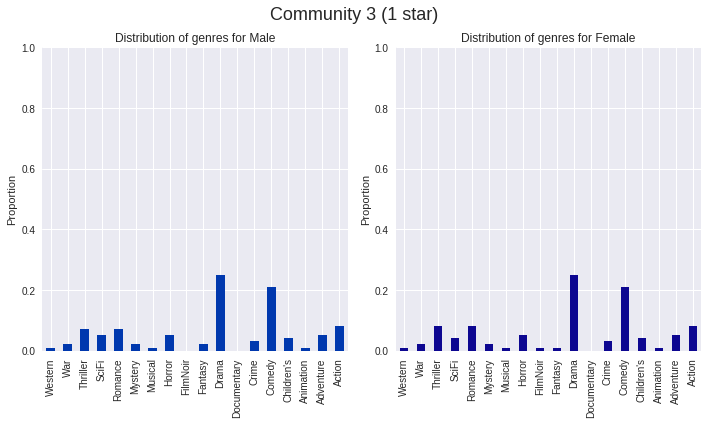

In [0]:
# Community 3 (1 stars)

fig = plt.figure()
fig.suptitle("Community 3 (1 star)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com3_genres_gender_df = plot_genre_dist_over_var(com3_users_movies_ratings_1, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com3_genres_gender_df.columns.values)):
    
    ax = com3_genres_gender_df[com3_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com3_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

##### Community 4

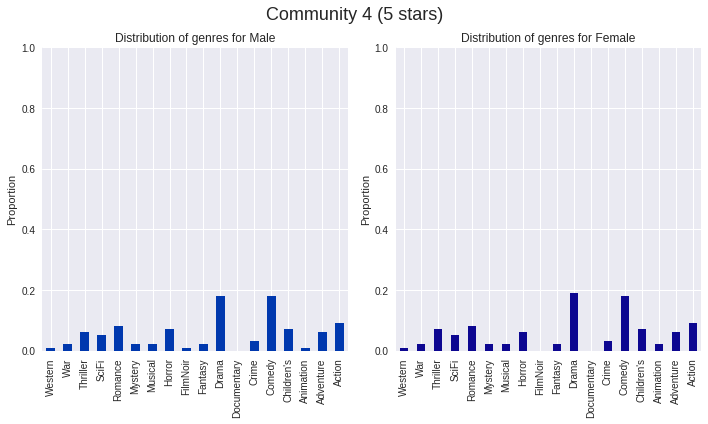

In [0]:
# Community 4 (5 stars)

fig = plt.figure()
fig.suptitle("Community 4 (5 stars)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com4_genres_gender_df = plot_genre_dist_over_var(com4_users_movies_ratings_5, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com4_genres_gender_df.columns.values)):
    
    ax = com4_genres_gender_df[com4_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com4_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

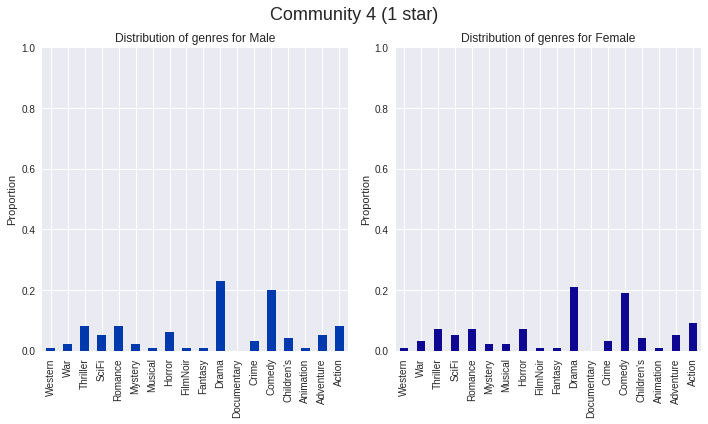

In [0]:
# Community 4 (1 stars)

fig = plt.figure()
fig.suptitle("Community 4 (1 star)", fontsize = 18)

# initial subplots area
gs = gridspec.GridSpec(1, 2)

# community's distribution of genres over each age group 
com4_genres_gender_df = plot_genre_dist_over_var(com4_users_movies_ratings_1, 1, "gender")

# plot each age group's distribution of genres 
# by genre/total_counts in each com in its own subplot
for idx in range(len(com4_genres_gender_df.columns.values)):
    
    ax = com4_genres_gender_df[com4_genres_gender_df.columns[idx]].plot(kind="bar", 
                                                                        color=color_list2[idx],
                                                                        figsize = [10,6],
                                                                        ax = plt.subplot(gs[idx]), # assign the subplot to each age group
                                                                        title = "Distribution of genres for %s" %com4_genres_gender_df.columns[idx]
                                                                        )
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1, auto=True)
    
gs.tight_layout(fig, rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-info">
All 4 communities have the same distribution of genres for both types of gender in both types of rating. The distribution also somewhat follows that of the population with the top genres being *Comedy*, *Drama* and *Action*. This signifies that <code>Gender</code> does not have any influence on the preferences of the audience.
</div>

#### Summary

<div class="alert alert-block alert-info">
    Similar to Section 2.2, we can see that the same User Demographic variables <code>**Age**</code>, <code>**Occupation**</code>, <code>**Residential Region**</code> have an influence on the preferences of the audiences while <code>**Gender**</code> does not. 
</div>

## 3. Sentiment Study

#### 3.1 Sentiments of Tags for best-rated movies of each community

In [0]:
print("The average sentiment of rating-5 movies for community 1 is {0:.4f}".format( np.mean(average_com_sentiment(com1_users_movies_ratings_5)) ) )
print("The average sentiment of rating-5 movies for community 2 is {0:.4f}".format( np.mean(average_com_sentiment(com2_users_movies_ratings_5)) ) )
print("The average sentiment of rating-5 movies for community 3 is {0:.4f}".format( np.mean(average_com_sentiment(com3_users_movies_ratings_5)) ) )
print("The average sentiment of rating-5 movies for community 4 is {0:.4f}".format( np.mean(average_com_sentiment(com4_users_movies_ratings_5)) ) )

The average sentiment of rating-5 movies for community 1 is 0.5502
The average sentiment of rating-5 movies for community 2 is 0.5948
The average sentiment of rating-5 movies for community 3 is 0.5458
The average sentiment of rating-5 movies for community 4 is 0.5993


<div class="alert alert-block alert-info">
The average sentiments of the best rated movies of each community are quite similar, hovering in the range of 0.5 and 0.6. This suggest that audiences have a **positive** sentiment towardsthese movies which explains why they have a 5 star rating.
</div>

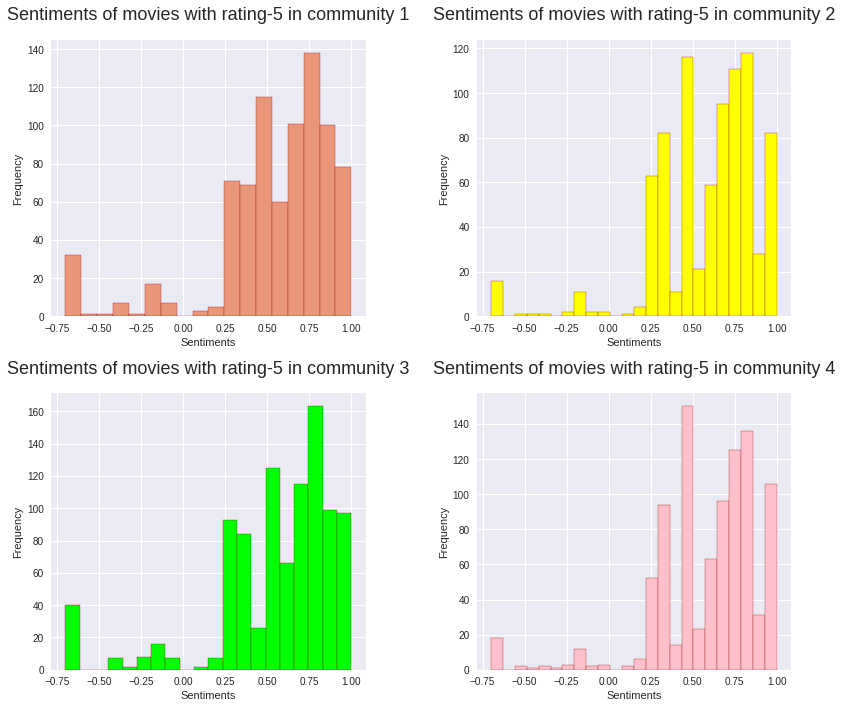

In [0]:
# distribution of sentiments in each community 
plt.figure(figsize=(12,10))

# community 1
plt.subplot(2,2,1)
freq, bins, patches = plt.hist(average_com_sentiment(com1_users_movies_ratings_5),
                      color='darksalmon',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-5 in community 1", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

# community 2
plt.subplot(2,2,2)
freq, bins, patches = plt.hist(average_com_sentiment(com2_users_movies_ratings_5),
                      color='yellow',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-5 in community 2", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
freq, bins, patches = plt.hist(average_com_sentiment(com3_users_movies_ratings_5),
                      color='lime',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-5 in community 3", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

# community 4
plt.subplot(2,2,4)
freq, bins, patches = plt.hist(average_com_sentiment(com4_users_movies_ratings_5),
                      color='pink',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-5 in community 4", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# distribution of sentiments are similar for all communities

<div class="alert alert-block alert-info">
The 4 communities follow a similar distribution for sentiment, with most sentiments ranging from 0.25 and above. 
</div>

#### 3.2 Sentiments of Tags for worst-rated movies of each community

In [0]:
print("The average sentiment of rating-1 movies for community 1 is {0:.4f}".format( np.mean(average_com_sentiment(com1_users_movies_ratings_1)) ) )
print("The average sentiment of rating-1 movies for community 2 is {0:.4f}".format( np.mean(average_com_sentiment(com2_users_movies_ratings_1)) ) )
print("The average sentiment of rating-1 movies for community 3 is {0:.4f}".format( np.mean(average_com_sentiment(com3_users_movies_ratings_1)) ) )
print("The average sentiment of rating-1 movies for community 4 is {0:.4f}".format( np.mean(average_com_sentiment(com4_users_movies_ratings_1)) ) )

The average sentiment of rating-1 movies for community 1 is 0.3761
The average sentiment of rating-1 movies for community 2 is 0.4075
The average sentiment of rating-1 movies for community 3 is 0.4159
The average sentiment of rating-1 movies for community 4 is 0.4785


<div class="alert alert-block alert-info">
The average sentiments of the worst rated movies of each community are quite similar, hovering in the range of 0.4 and 0.5. Although the sentiment values are less than that of the best rated movies, these sentiments still veer towards the positive side. One reason could be these movies are well liked by audiences from other communities and these audiences happened to watch the movies and dislike it.
</div>

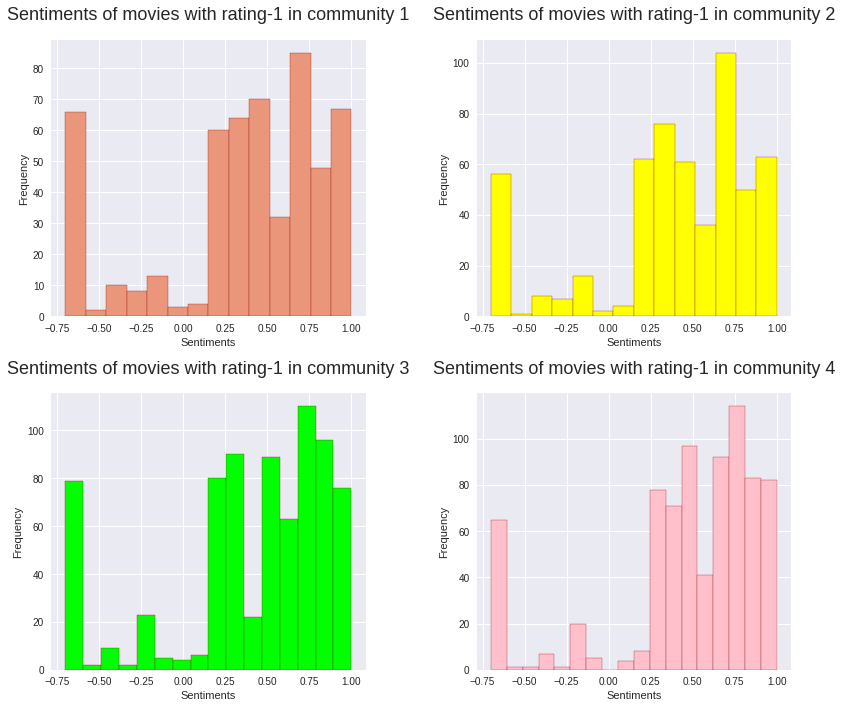

In [0]:
# distribution of sentiments in each community 
plt.figure(figsize=(12,10))

# community 1
plt.subplot(2,2,1)
freq, bins, patches = plt.hist(average_com_sentiment(com1_users_movies_ratings_1),
                      color='darksalmon',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-1 in community 1", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

# community 2
plt.subplot(2,2,2)
freq, bins, patches = plt.hist(average_com_sentiment(com2_users_movies_ratings_1),
                      color='yellow',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-1 in community 2", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
freq, bins, patches = plt.hist(average_com_sentiment(com3_users_movies_ratings_1),
                      color='lime',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-1 in community 3", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

# community 4
plt.subplot(2,2,4)
freq, bins, patches = plt.hist(average_com_sentiment(com4_users_movies_ratings_1),
                      color='pink',
                      edgecolor='darkred',
                      bins="auto")
plt.title("Sentiments of movies with rating-1 in community 4", fontsize=18, pad=20)
plt.xlabel("Sentiments")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# distribution of sentiments are similar for all communities

<div class="alert alert-block alert-info">
Just like the sentiment distribution for the best rated movies, the 4 communities follow a similar distribution, with most sentiments ranging from 0.25 and above. Since both distributions are quite similar to each other, we can conclude that <code>**Sentiments**</code> of the tags does not have any differentiating power to uniquely identify each community.
</div>

## 4. Tags Study

### 4.1 Word Clouds for best & worst-rated movies

##### Community 1

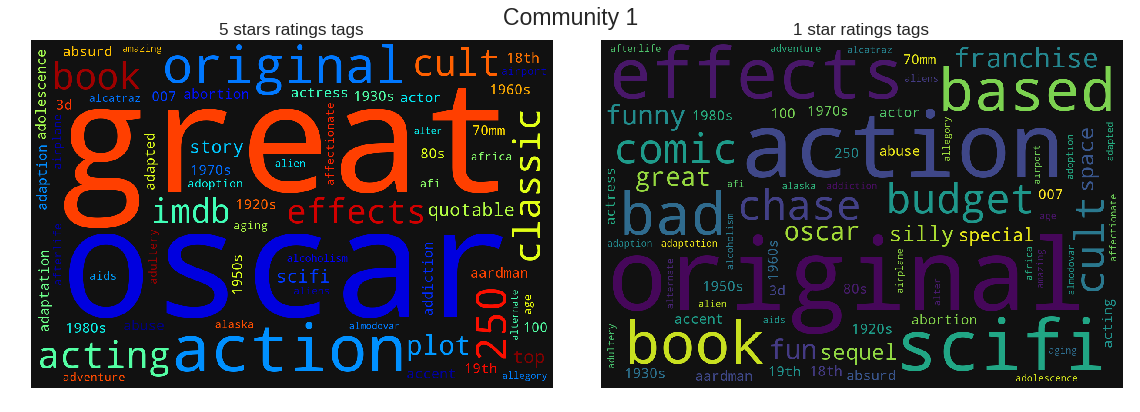

In [0]:
plt.figure(figsize=(16,16))
plt.suptitle("Community 1", fontsize=23)

plt.subplot(1,2,1)
# get word frequencies of tags (5 stars)
dict_5star = get_tfidf_string(com_giant_tags_5stars, 1)
for k, v in dict_5star.items():
    dict_5star[k] = (v*10) + 1
    dict_5star[k] = int(dict_5star[k])
    
wordcloud_com_5stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111", 
                                 colormap='jet').generate_from_frequencies( dict_5star )
img_com = plt.imshow(wordcloud_com_5stars)
plt.axis("off")
plt.title("5 stars ratings tags", fontsize=17)

plt.subplot(1,2,2)
# get word frequencies of tags (1 stars)
dict_1star = get_tfidf_string(com_giant_tags_1stars, 1)
for k, v in dict_1star.items():
    dict_1star[k] = (v*10) + 1
    dict_1star[k] = int(dict_1star[k])
    
wordcloud_com_1stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111",
                                 collocations=False).generate_from_frequencies( dict_1star )
img_com = plt.imshow(wordcloud_com_1stars)
plt.axis("off")
plt.title("1 star ratings tags", fontsize=17)

plt.tight_layout(rect=[0, 0, 1, 1.6])
plt.show()

##### Community 2

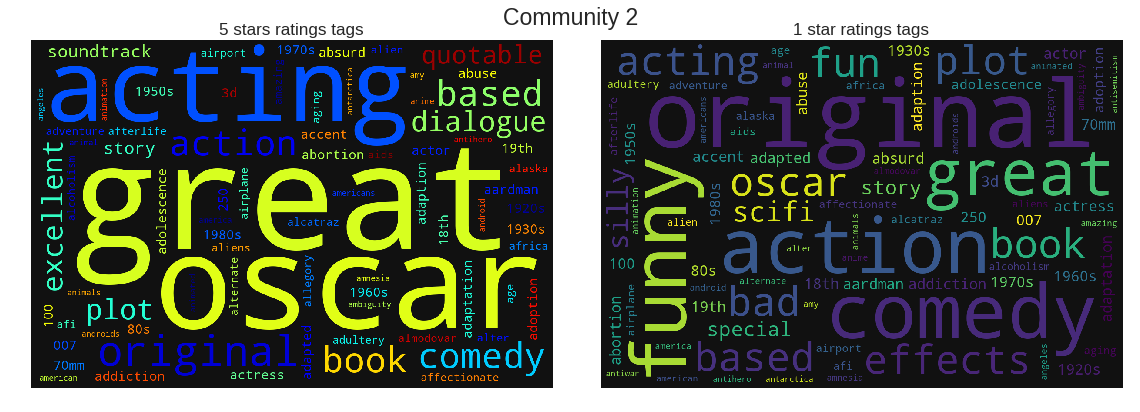

In [0]:
plt.figure(figsize=(16,16))
plt.suptitle("Community 2", fontsize=23)

plt.subplot(1,2,1)
# get word frequencies of tags (5 stars)
dict_5star = get_tfidf_string(com_giant_tags_5stars, 2)
for k, v in dict_5star.items():
    dict_5star[k] = (v*10) + 1
    dict_5star[k] = int(dict_5star[k])
    
wordcloud_com_5stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111", 
                                 colormap='jet').generate_from_frequencies( dict_5star )
img_com = plt.imshow(wordcloud_com_5stars)
plt.axis("off")
plt.title("5 stars ratings tags", fontsize=17)

plt.subplot(1,2,2)
# get word frequencies of tags (1 stars)
dict_1star = get_tfidf_string(com_giant_tags_1stars, 2)
for k, v in dict_1star.items():
    dict_1star[k] = (v*10) + 1
    dict_1star[k] = int(dict_1star[k])
    
wordcloud_com_1stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111",
                                 collocations=False).generate_from_frequencies( dict_1star )
img_com = plt.imshow(wordcloud_com_1stars)
plt.axis("off")
plt.title("1 star ratings tags", fontsize=17)

plt.tight_layout(rect=[0, 0, 1, 1.6])
plt.show()

##### Community 3

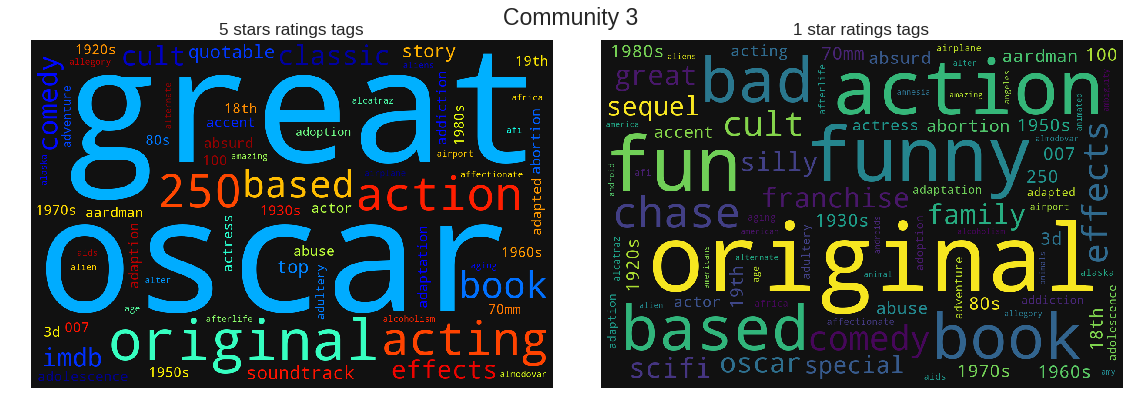

In [0]:
plt.figure(figsize=(16,16))
plt.suptitle("Community 3", fontsize=23)

plt.subplot(1,2,1)
# get word frequencies of tags (5 stars)
dict_5star = get_tfidf_string(com_giant_tags_5stars, 3)
for k, v in dict_5star.items():
    dict_5star[k] = (v*10) + 1
    dict_5star[k] = int(dict_5star[k])
    
wordcloud_com_5stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111", 
                                 colormap='jet').generate_from_frequencies( dict_5star )
img_com = plt.imshow(wordcloud_com_5stars)
plt.axis("off")
plt.title("5 stars ratings tags", fontsize=17)

plt.subplot(1,2,2)
# get word frequencies of tags (1 stars)
dict_1star = get_tfidf_string(com_giant_tags_1stars, 3)
for k, v in dict_1star.items():
    dict_1star[k] = (v*10) + 1
    dict_1star[k] = int(dict_1star[k])
    
wordcloud_com_1stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111",
                                 collocations=False).generate_from_frequencies( dict_1star )
img_com = plt.imshow(wordcloud_com_1stars)
plt.axis("off")
plt.title("1 star ratings tags", fontsize=17)

plt.tight_layout(rect=[0, 0, 1, 1.6])
plt.show()

##### Community 4

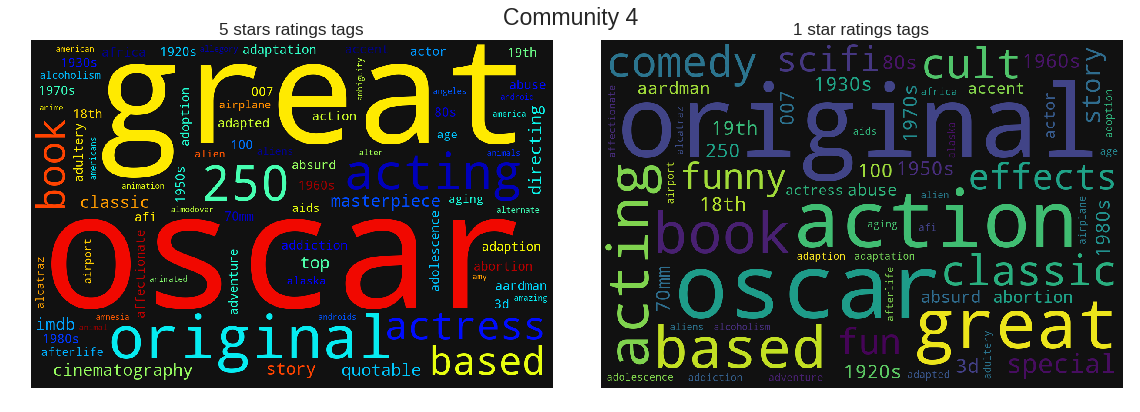

In [0]:
plt.figure(figsize=(16,16))
plt.suptitle("Community 4", fontsize=23)

plt.subplot(1,2,1)
# get word frequencies of tags (5 stars)
dict_5star = get_tfidf_string(com_giant_tags_5stars, 4)
for k, v in dict_5star.items():
    dict_5star[k] = (v*10) + 1
    dict_5star[k] = int(dict_5star[k])
    
wordcloud_com_5stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111", 
                                 colormap='jet').generate_from_frequencies( dict_5star )
img_com = plt.imshow(wordcloud_com_5stars)
plt.axis("off")
plt.title("5 stars ratings tags", fontsize=17)

plt.subplot(1,2,2)
# get word frequencies of tags (1 stars)
dict_1star = get_tfidf_string(com_giant_tags_1stars, 4)
for k, v in dict_1star.items():
    dict_1star[k] = (v*10) + 1
    dict_1star[k] = int(dict_1star[k])
    
wordcloud_com_1stars = WordCloud(width=1200, height=800, scale=1,
                                 min_font_size=18, margin=20, 
                                 background_color="#111",
                                 collocations=False).generate_from_frequencies( dict_1star )
img_com = plt.imshow(wordcloud_com_1stars)
plt.axis("off")
plt.title("1 star ratings tags", fontsize=17)

plt.tight_layout(rect=[0, 0, 1, 1.6])
plt.show()

#### Number of Best rated and Worst rated movies with common tags

In [0]:
# Investigating why some tags defining the best rated movies appears in the worst rated movies

# get all movies with the tag 'good'
movies_with_good_tag = master_movies_df[master_movies_df['tags_clean'].str.contains('good')]['movie_id']
# There are 977 movies with 'good' tag

# get all movies rated as 5 stars
movies_5star = (master_ratings_df_full.loc[master_ratings_df_full['rating']==5, 'movie'].unique())
# get all movies rated as 1 star
movies_1star = (master_ratings_df_full.loc[master_ratings_df_full['rating']==1, 'movie'].unique())

# get 1 stars movies with the tag 'good'
movies_1star_with_goodtag = set.intersection(set(movies_1star), list(movies_with_good_tag))
# get 5 stars movies with the tag 'good'
movies_5star_with_goodtag = set.intersection(set(movies_5star), list(movies_with_good_tag))

# get movies that were rated with both type of ratings and has the tag 'good'
print("There are %d movies with the 'good' tag which were rated as the best and worst." %len(set.intersection(set(movies_1star_with_goodtag), list(movies_5star_with_goodtag))))

There are 857 movies with the 'good' tag which were rated as the best and worst.


#### Summary of Tags Study

<div class="alert alert-block alert-info">
In general, the best rated movies have tags such as *oscar*, *great* and *original* which are typical words that describe how a well-liked movie would be. On the other hand, we noticed words which appeared in the word clouds for best rated movies also appears in worst rated movies word clouds. These words include *great*, *good*, *best*. On further investigation, we discovered that there are 5 star movies with 'good' tag that are also rated as 1 star by some users in the community. These movies could be liked by some audiences while disliked by others in the community. Another reason could be due to the contents of the movie. Although the same movie has the genre which is preferred by both audience, the contents can be subjective and we are unable to determine that here. We decided to remove these words from the word clouds.
<br><br>
In addition, some word clouds contains different sized genre tags. These may indicate what genres audiences in the community might like/dislike. For example in community 1's worst rated movies word cloud, genres such as *scifi* appears larger than that in community 2. This suggest community 1's audience may not prefer scifi movies. Certain genre tags appears in some community while others don't. This also may indicate what genres audiences in the community might like/dislike. Tags such as *comic* and *classic* appears only in community 1 and 4's worst rated movies word clouds respectively would suggest that audiences in these communities do not prefer such genres as they tend to give bad ratings to them. 
<br><br>
Although the word clouds are relatively similar to each other, we are still able to see the differences between each community. Hence, we conclude that *Tags* has a weak significance in uniquely identifying each community. 
</div>

## 5. Cast & Director Study

#### 5.1 Most popular casts among rating-5 movies

In [0]:
com1_actors = Counter(com_movie_var(com1_users_movies_ratings_5, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts in community 1 are:", *[x[0] for x in com1_actors], sep="\n")

The top 5 most frequent casts in community 1 are:
RobertDeNiro
GeneHackman
SeanConnery
MelGibson
HarrisonFord


In [0]:
com2_actors = Counter(com_movie_var(com2_users_movies_ratings_5, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts in community 2 are:", *[x[0] for x in com2_actors], sep="\n")

The top 5 most frequent casts in community 2 are:
RobertDeNiro
SeanConnery
GeneHackman
HarrisonFord
Narratedby


In [0]:
com3_actors = Counter(com_movie_var(com3_users_movies_ratings_5, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts in community 3 are:", *[x[0] for x in com3_actors], sep="\n")

The top 5 most frequent casts in community 3 are:
RobertDeNiro
SeanConnery
GeneHackman
BruceWillis
Narratedby


In [0]:
com4_actors = Counter(com_movie_var(com4_users_movies_ratings_5, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts in community 4 are:", *[x[0] for x in com4_actors], sep="\n")

The top 5 most frequent casts in community 4 are:
RobertDeNiro
SeanConnery
GeneHackman
MelGibson
Narratedby


#### 5.2 Most popular casts among rating-1 movies

In [0]:
com1_actors = Counter(com_movie_var(com1_users_movies_ratings_1, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts in community 1 are:", *[x[0] for x in com1_actors], sep="\n")

The top 5 most frequent casts in community 1 are:
na
MelGibson
RobinWilliams
BruceWillis
SeanConnery


In [0]:
com2_actors = Counter(com_movie_var(com2_users_movies_ratings_1, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts of movies with 1 star in community 2 are:", *[x[0] for x in com2_actors], sep="\n")

The top 5 most frequent casts of movies with 1 star in community 2 are:
BruceWillis
RobinWilliams
WhoopiGoldberg
GeneHackman
MelGibson


In [0]:
com3_actors = Counter(com_movie_var(com3_users_movies_ratings_1, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts of movies with 1 star in community 3 are:", *[x[0] for x in com3_actors], sep="\n")

The top 5 most frequent casts of movies with 1 star in community 3 are:
RobertDeNiro
DemiMoore
BruceWillis
WhoopiGoldberg
MelGibson


In [0]:
com4_actors = Counter(com_movie_var(com4_users_movies_ratings_1, "Cast_clean")).most_common(5)
print("The top 5 most frequent casts of movies with 1 star in community 4 are:", *[x[0] for x in com4_actors], sep="\n")

The top 5 most frequent casts of movies with 1 star in community 4 are:
RobertDeNiro
RobinWilliams
MelGibson
SeanConnery
GeneHackman


<div class="alert alert-block alert-info">
Although we do observe that each community have different results for each type of rating, the differences are very minor and not significant enough to warrant that the communities are different. We also noticed that certain cast members appears in all the communities. This might imply that these casts have acted in many movies of different genres. These 2 observations allow us to conclude that <code>Cast</code> is *not significant* in uniquely identifying each community. 
</div>

#### 5.3 Most popular directors among rating-5 and rating-1 movies

In [0]:
# top 5 directors in community 1 (rating 5)
com1_actors = Counter(com_movie_var(com1_users_movies_ratings_5, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-5 movies in community 1 are:", *[x[0] for x in com1_actors], sep="\n")

print('-'*100)

# top 5 directors in community 1 (rating 1)
com1_actors = Counter(com_movie_var(com1_users_movies_ratings_1, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-1 movies in community 1 are:", *[x[0] for x in com1_actors], sep="\n")

The top 5 most frequent directors of rating-5 movies in community 1 are:
John
Robert
David
Michael
Peter
----------------------------------------------------------------------------------------------------
The top 5 most frequent directors of rating-1 movies in community 1 are:
John
Robert
David
Michael
Peter


In [0]:
# top 5 directors in community 2 (rating 5)
com2_actors = Counter(com_movie_var(com2_users_movies_ratings_5, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-5 movies in community 1 are:", *[x[0] for x in com2_actors], sep="\n")

print('-'*100)

# top 5 directors in community 2 (rating 1)
com2_actors = Counter(com_movie_var(com2_users_movies_ratings_1, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-1 movies in community 1 are:", *[x[0] for x in com2_actors], sep="\n")

The top 5 most frequent directors of rating-5 movies in community 1 are:
John
David
Robert
Michael
Peter
----------------------------------------------------------------------------------------------------
The top 5 most frequent directors of rating-1 movies in community 1 are:
John
David
Robert
Peter
Michael


In [0]:
# top 5 directors in community 3 (rating 5)
com3_actors = Counter(com_movie_var(com3_users_movies_ratings_5, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-5 movies in community 3 are:", *[x[0] for x in com3_actors], sep="\n")

print('-'*100)

# top 5 directors in community 3 (rating 1)
com3_actors = Counter(com_movie_var(com3_users_movies_ratings_1, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-1 movies in community 3 are:", *[x[0] for x in com3_actors], sep="\n")

The top 5 most frequent directors of rating-5 movies in community 3 are:
John
Robert
Michael
David
Richard
----------------------------------------------------------------------------------------------------
The top 5 most frequent directors of rating-1 movies in community 3 are:
John
Robert
Michael
David
Richard


In [0]:
# top 5 directors in community 4 (rating 5)
com4_actors = Counter(com_movie_var(com4_users_movies_ratings_5, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-5 movies in community 4 are:", *[x[0] for x in com4_actors], sep="\n")

print('-'*100)

# top 5 directors in community 4 (rating 1)
com4_actors = Counter(com_movie_var(com4_users_movies_ratings_1, "Director")).most_common(5)
print("The top 5 most frequent directors of rating-1 movies in community 4 are:", *[x[0] for x in com4_actors], sep="\n")

The top 5 most frequent directors of rating-5 movies in community 4 are:
John
Robert
Michael
David
Richard
----------------------------------------------------------------------------------------------------
The top 5 most frequent directors of rating-1 movies in community 4 are:
John
Robert
David
Michael
Peter


<div class="alert alert-block alert-info">
We observed that each community has the same list of directors for both its best rated and worst rated movies. These lists consist of the same set directors which implies 2 things. First, it could be these directors has directed many movies, both good and bad movies. Second, all the communities watch only movies directed by these directors. Thus, we conclude that <code>Directors</code> is *not significant* in identifying each community.
</div>

## 6. Overall Conclusion for Community Study

<div class="alert alert-block alert-info">
In this notebook, we have attempted to find out if the communities can be uniquely identified by variables in both movie metadata and user demographics. Univariate analysis of each variable has shown that certain variables such as <code>Age</code>, <code>Occupation</code>, <code>Residential Region</code> do have some differentiating power to uniquely identify each community while the others do not. To verify our hypotheses, Multivariate analysis was done with each variable in relation with both <code>Ratings</code> and <code>Genres</code>. The analysis shows similar results as our univariate analysis with the same variables showing significant differences between communities. Thus from our analysis, we conclude that variables from user demographics: <code>Age</code>, <code>Occupation</code> and <code>Residential Region</code> are able to uniquely identify the communities. 
<br><br>
Further improvements can be made by accounting for interactions between the variables. As movie preferences and ratings are subjective, they are not only influenced by a single variable. Having these interaction variables can better highlight variables that does not have an influence by itself. Additional variables about movies and audiences could weld further insights on the unique traits of each community. An example would be audience reviews on each movie. This variable is more likely to give us more insights as each review is linked with a rating value which makes it unique.
</div>

---